# **Median Household Incomes Corresponding to Counties in US**

In this study, we aim at analysing the unemployment and it correlation belonging to household of different counties in United States. By using the employment rate, unemplyment rate and civilian labor foce information, we shall predict the median household income of the counties. The The data that is used in this study can be obtained at https://www.prb.org/usdata/indicator/income/snapshot/

Household income is an economic standard that can be applied to one household, or aggregated across a large group such as a county, city, or the whole country. It is commonly used by the United States government and private institutions to describe a household's economic status or to track economic trends in the US.

A key measure of household income is the "real median" statistic. "Real", indicating adjustment has been made for changes to the price of goods and services across time. "Median", indicating half of households have income above that level and half below. According to the U.S. Census, this measure was `$`63,179 for Americans in 2018. As compared to `$`62,626 in 2017 (a 0.9% increase to 2019), `$`58,811 in 2008 (a 7.4% increase), and `$`55,716 in 1988 (a 13.4% increase).

Real Median Household Income is part of the "Income and Poverty" series of the American Community Survey.

The distribution of U.S. household income has become more unequal since around 1980, with the income share received by the top 1% trending upward from around 10% or less over the 1953–1981 period to over 20% by 2007. After falling somewhat due to the Great Recession in 2008 and 2009, inequality rose again during the economic recovery, a typical pattern historically. (Wiki)

In [2]:
# Import some libraries to clean and analyze our data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

In [3]:
# Reading CSV file by using pandas. 
df_une = pd.read_csv('Unemployment.csv', skiprows=7, thousands=r',')

In [4]:
# Dispaly some records in our data
df_une.head()

,FIPS,State,Area_name,coe,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,US,United States,us,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,...,160273906.0,153293830.0,6980076.0,4.4,161640488.0,155344043.0,6296445.0,3.9,"$60,336",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2178243.0,2081676.0,96567.0,4.4,2198837.0,2112347.0,86490.0,3.9,"$48,193",100.0
2,1001,AL,Autauga County,AL,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25972.0,24958.0,1014.0,3.9,25957.0,25015.0,942.0,3.6,"$58,343",121.1
3,1003,AL,Baldwin County,AL,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,92090.0,88342.0,3748.0,4.1,93849.0,90456.0,3393.0,3.6,"$56,607",117.5
4,1005,AL,Barbour County,AL,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8317.0,7831.0,486.0,5.8,8373.0,7940.0,433.0,5.2,"$32,490",67.4


In [5]:
# Removing commas, dollar signs ($) and covert the type of column "Median_Household_Income_2017" to float 

#df_une.apply(lambda s:s.str.replace('$', ""))
#df_une.head()
df_une['Median_Household_Income_2017'] = df_une['Median_Household_Income_2017'].str.replace(',', '')
df_une['Median_Household_Income_2017'] = df_une['Median_Household_Income_2017'].str.replace('$', '')
df_une['Median_Household_Income_2017'] = df_une['Median_Household_Income_2017'].astype(float)

In [6]:
# Since our analysis focuses on counties not the states, therefore, we need to remove the states from our data 

states = ['United States','Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
         'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
         'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
         'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
         'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico', 
          'District of Columbia']
         
# ' Los Angeles County, CA', 'Los Angeles County, CA', 'Cook County, IL', 'Harris County, TX', 
#  'Maricopa County, AZ', 'Orange County, CA', 'San Diego County, CA']

In [7]:
# Removing the rows that are not counties 
for s in states:
    temp = np.array(df_une.index[df_une['Area_name'] == s])
    df_une = df_une.drop(df_une.index[temp])
    df_une.reset_index(drop=True, inplace=True)

In [8]:
df_une.head()

,FIPS,State,Area_name,coe,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,1001,AL,Autauga County,AL,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25972.0,24958.0,1014.0,3.9,25957.0,25015.0,942.0,3.6,58343.0,121.1
1,1003,AL,Baldwin County,AL,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,92090.0,88342.0,3748.0,4.1,93849.0,90456.0,3393.0,3.6,56607.0,117.5
2,1005,AL,Barbour County,AL,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8317.0,7831.0,486.0,5.8,8373.0,7940.0,433.0,5.2,32490.0,67.4
3,1007,AL,Bibb County,AL,1.0,1.0,8791.0,8432.0,359.0,4.1,...,8550.0,8174.0,376.0,4.4,8661.0,8317.0,344.0,4.0,45795.0,95.0
4,1009,AL,Blount County,AL,1.0,1.0,26629.0,25780.0,849.0,3.2,...,24725.0,23726.0,999.0,4.0,25006.0,24128.0,878.0,3.5,48253.0,100.1


In [9]:
df_une.shape

(3220, 56)

In [10]:
# Displaying the columns' names of the data frame

df_une.columns

Index(['FIPS', 'State', 'Area_name', ' coe', 'Urban_influence_code_2013',
       'Metro_2013', ' Civilian_labor_force_2007 ', ' Employed_2007 ',
       ' Unemployed_2007 ', 'Unemployment_rate_2007',
       ' Civilian_labor_force_2008 ', ' Employed_2008 ', ' Unemployed_2008 ',
       'Unemployment_rate_2008', 'Civilian_labor_force_2009', 'Employed_2009',
       'Unemployed_2009', 'Unemployment_rate_2009',
       ' Civilian_labor_force_2010 ', ' Employed_2010 ', ' Unemployed_2010 ',
       'Unemployment_rate_2010', ' Civilian_labor_force_2011 ',
       ' Employed_2011 ', ' Unemployed_2011 ', 'Unemployment_rate_2011',
       ' Civilian_labor_force_2012 ', ' Employed_2012 ', ' Unemployed_2012 ',
       'Unemployment_rate_2012', ' Civilian_labor_force_2013 ',
       ' Employed_2013 ', ' Unemployed_2013 ', 'Unemployment_rate_2013',
       ' Civilian_labor_force_2014 ', ' Employed_2014 ', ' Unemployed_2014 ',
       'Unemployment_rate_2014', ' Civilian_labor_force_2015 ',
       ' Employed_20

In [11]:
# We can see that there some spaces in the columns' name as shown above, so remove them out

df_une.columns = df_une.columns.str.replace(' ', '')

In [12]:
df_une.columns

Index(['FIPS', 'State', 'Area_name', 'coe', 'Urban_influence_code_2013',
       'Metro_2013', 'Civilian_labor_force_2007', 'Employed_2007',
       'Unemployed_2007', 'Unemployment_rate_2007',
       'Civilian_labor_force_2008', 'Employed_2008', 'Unemployed_2008',
       'Unemployment_rate_2008', 'Civilian_labor_force_2009', 'Employed_2009',
       'Unemployed_2009', 'Unemployment_rate_2009',
       'Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010',
       'Unemployment_rate_2010', 'Civilian_labor_force_2011', 'Employed_2011',
       'Unemployed_2011', 'Unemployment_rate_2011',
       'Civilian_labor_force_2012', 'Employed_2012', 'Unemployed_2012',
       'Unemployment_rate_2012', 'Civilian_labor_force_2013', 'Employed_2013',
       'Unemployed_2013', 'Unemployment_rate_2013',
       'Civilian_labor_force_2014', 'Employed_2014', 'Unemployed_2014',
       'Unemployment_rate_2014', 'Civilian_labor_force_2015', 'Employed_2015',
       'Unemployed_2015', 'Unemployment_rate_201

In [13]:
# Showing the data types of each column

df_une.dtypes

FIPS                                           int64
State                                         object
Area_name                                     object
coe                                           object
Urban_influence_code_2013                    float64
Metro_2013                                   float64
Civilian_labor_force_2007                    float64
Employed_2007                                float64
Unemployed_2007                              float64
Unemployment_rate_2007                       float64
Civilian_labor_force_2008                    float64
Employed_2008                                float64
Unemployed_2008                              float64
Unemployment_rate_2008                       float64
Civilian_labor_force_2009                    float64
Employed_2009                                float64
Unemployed_2009                              float64
Unemployment_rate_2009                       float64
Civilian_labor_force_2010                    f

## Statistics of the data

In [14]:
# Displaying some statistics of the data 

df_une.describe()

,FIPS,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
count,3220.000000,3217.000000,3220.000000,3.215000e+03,3.215000e+03,3215.000000,3215.000000,3.215000e+03,3.215000e+03,3215.000000,...,3.217000e+03,3.217000e+03,3217.000000,3217.000000,3.217000e+03,3.217000e+03,3217.000000,3217.000000,3140.000000,3140.000000
mean,31365.205901,5.192104,0.382609,4.766401e+04,4.543379e+04,2230.213997,5.070700,4.813690e+04,4.532639e+04,2810.509487,...,5.003371e+04,4.783513e+04,2198.581287,4.799813,5.045390e+04,4.847315e+04,1980.749767,4.299254,51081.273885,89.078662
std,16294.003166,3.506802,0.486099,1.533682e+05,1.462215e+05,7317.751216,2.129933,1.550960e+05,1.453872e+05,9967.241192,...,1.650492e+05,1.577072e+05,7473.974745,2.171227,1.667638e+05,1.600205e+05,6880.959349,1.885794,13490.143084,20.061379
min,1001.000000,1.000000,0.000000,4.100000e+01,3.800000e+01,3.000000,1.500000,4.300000e+01,4.000000e+01,3.000000,...,1.000000e+02,9.500000e+01,5.000000,1.500000,1.020000e+02,9.800000e+01,4.000000,1.300000,22679.000000,39.900000
25%,19030.500000,2.000000,0.000000,5.226000e+03,4.942500e+03,257.000000,3.700000,5.256000e+03,4.947000e+03,307.000000,...,4.946000e+03,4.697000e+03,227.000000,3.500000,4.928000e+03,4.717000e+03,206.000000,3.100000,42274.750000,76.000000
50%,30022.000000,5.000000,0.000000,1.216500e+04,1.141000e+04,634.000000,4.700000,1.219400e+04,1.131300e+04,764.000000,...,1.134000e+04,1.081500e+04,551.000000,4.400000,1.139500e+04,1.094100e+04,495.000000,3.900000,48868.000000,86.100000
75%,46103.500000,8.000000,1.000000,3.135000e+04,2.993350e+04,1581.500000,5.800000,3.168450e+04,2.986800e+04,1938.500000,...,3.068400e+04,2.948900e+04,1455.000000,5.500000,3.086900e+04,2.964900e+04,1287.000000,4.900000,56682.500000,98.800000
max,72151.000000,12.000000,1.000000,4.864160e+06,4.614776e+06,249384.000000,20.400000,4.928959e+06,4.555103e+06,373856.000000,...,5.096516e+06,4.853818e+06,242698.000000,20.600000,5.136341e+06,4.896512e+06,239829.000000,19.900000,136191.000000,251.400000


In [15]:
# Drom some columns that we are not interested in our analysis 
col_drop = ['coe']
df_une.drop(columns=['Urban_influence_code_2013','Urban_influence_code_2013'], inplace=True)

In [16]:
df_une.drop(columns=['Metro_2013'], inplace=True)

In [17]:
df_une.shape

(3220, 54)

In [18]:
# Dropping empty values from the data frame

df_une.dropna(inplace=True)

In [19]:
# Checking whether there are still some missing values. 

df_une.isna().sum()   # or s.isnull().sum() for older pandas versions

FIPS                                         0
State                                        0
Area_name                                    0
coe                                          0
Civilian_labor_force_2007                    0
Employed_2007                                0
Unemployed_2007                              0
Unemployment_rate_2007                       0
Civilian_labor_force_2008                    0
Employed_2008                                0
Unemployed_2008                              0
Unemployment_rate_2008                       0
Civilian_labor_force_2009                    0
Employed_2009                                0
Unemployed_2009                              0
Unemployment_rate_2009                       0
Civilian_labor_force_2010                    0
Employed_2010                                0
Unemployed_2010                              0
Unemployment_rate_2010                       0
Civilian_labor_force_2011                    0
Employed_2011

# Data Exploration Analysis: visualizations

#### Below we shall plot some distributions of the data

In [20]:
# Function to plot the distributions of the data 

def plot_dist(df, column_names, rows, cols):
    f, axes = plt.subplots(rows,cols, figsize=(17, 50), sharex=False, constrained_layout=True)

    i = 0
    for r in range(rows):
        for c in range(cols):
            if i == len(column_names):
                break
            sns.distplot(df[column_names[i]], ax = axes[r,c])
            i+=1
            
    plt.show()

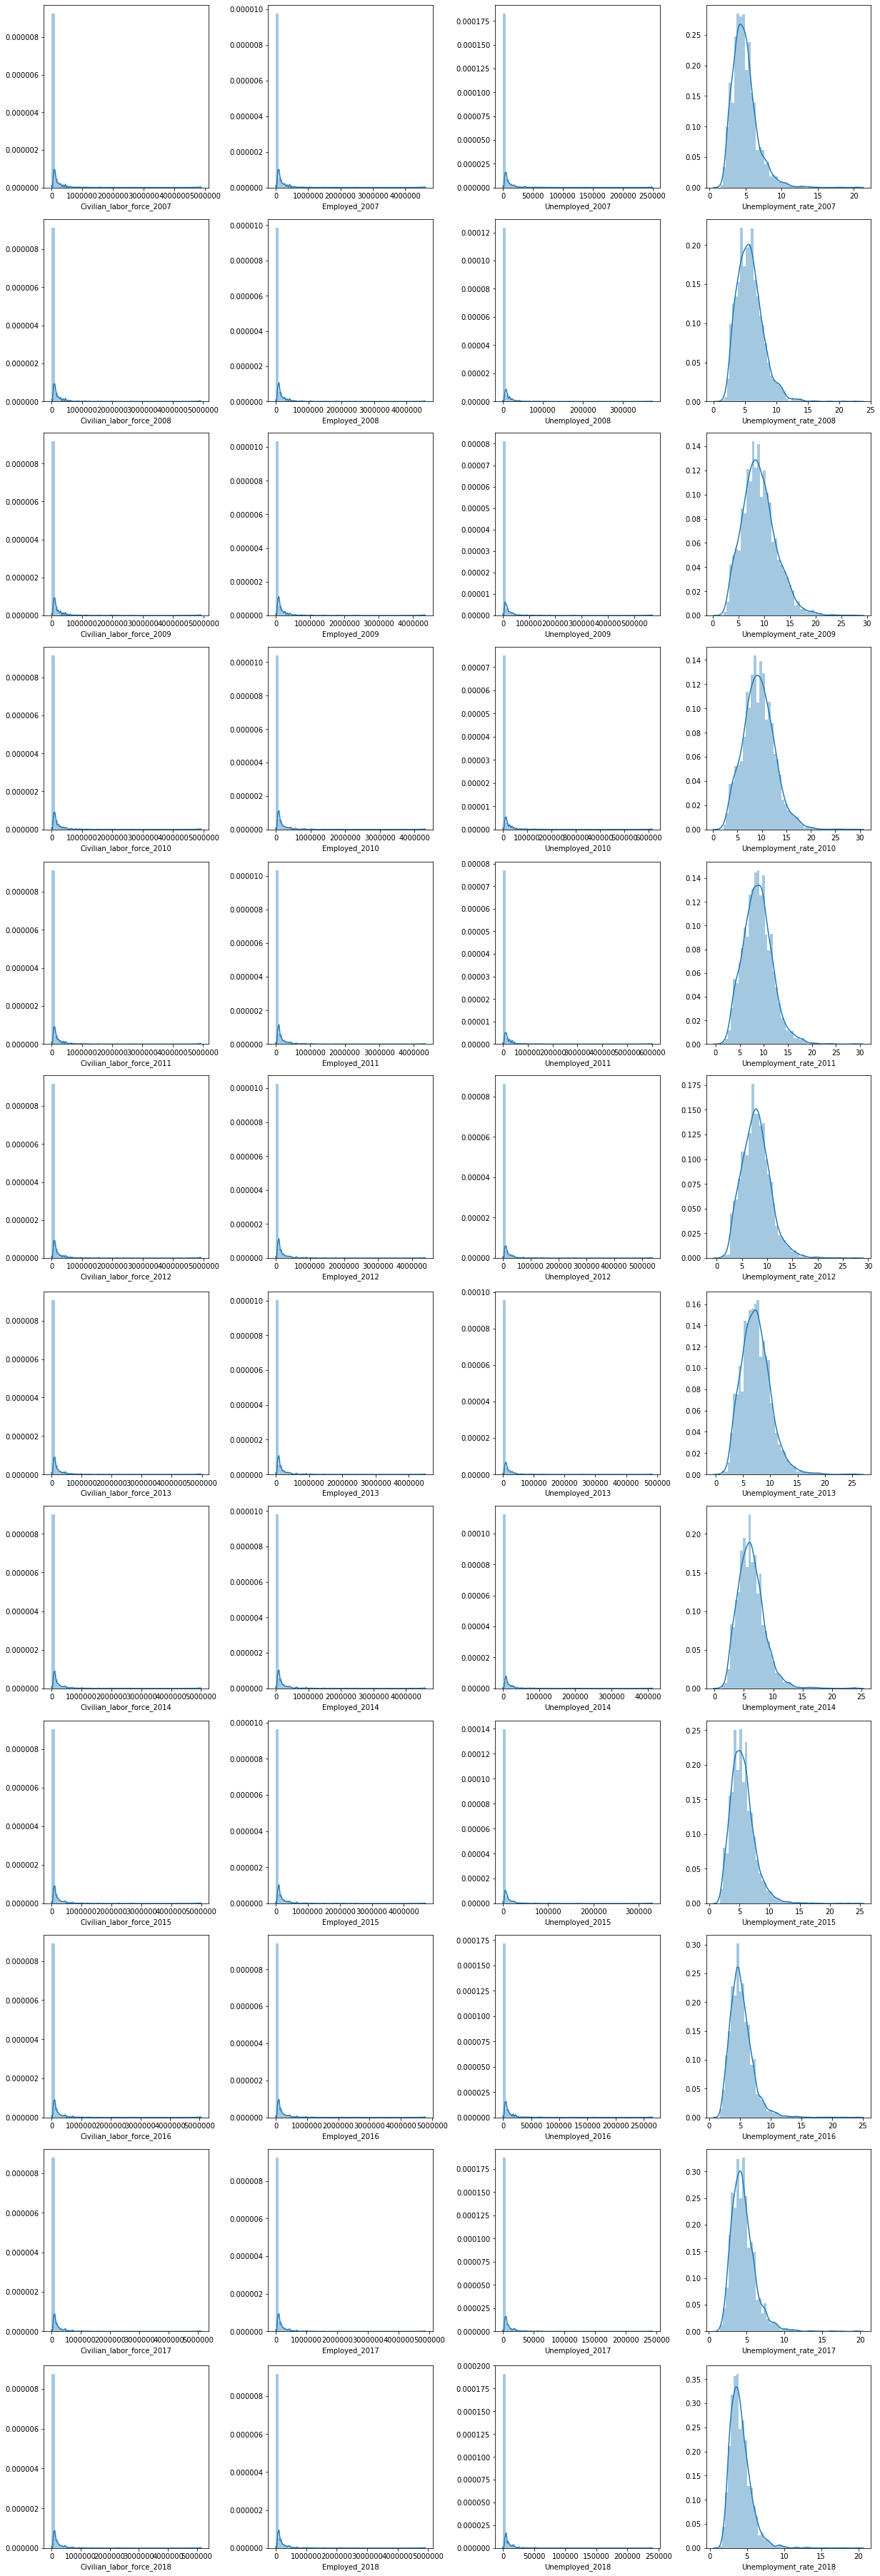

In [21]:
col_names = ['Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007', 'Unemployment_rate_2007', 
             'Civilian_labor_force_2008', 'Employed_2008', 'Unemployed_2008', 'Unemployment_rate_2008', 
             'Civilian_labor_force_2009', 'Employed_2009', 'Unemployed_2009', 'Unemployment_rate_2009', 
             'Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010', 'Unemployment_rate_2010',
             'Civilian_labor_force_2011', 'Employed_2011', 'Unemployed_2011', 'Unemployment_rate_2011', 
             'Civilian_labor_force_2012', 'Employed_2012', 'Unemployed_2012', 'Unemployment_rate_2012', 
             'Civilian_labor_force_2013', 'Employed_2013', 'Unemployed_2013', 'Unemployment_rate_2013', 
             'Civilian_labor_force_2014', 'Employed_2014', 'Unemployed_2014', 'Unemployment_rate_2014',
             'Civilian_labor_force_2015', 'Employed_2015', 'Unemployed_2015', 'Unemployment_rate_2015', 
             'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016', 'Unemployment_rate_2016', 
             'Civilian_labor_force_2017', 'Employed_2017', 'Unemployed_2017', 'Unemployment_rate_2017', 
             'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018'
            ]

# len(col_names) = rows * cols 
plot_dist(df_une, col_names, rows = 12, cols = 4)

#### Let compare the figures above with figures that used log-log plot as following: 

In [22]:
def plot_log(df, column_names, rows, cols, kind):
    #seting axis names
    i = 1
    axes = []
    for r in range(rows):
        if i > len(column_names):
            break
        col_ax = []
        for c in range(cols): 
            tuple_name = 'ax'+str(i)
            col_ax.append(tuple_name)
        axes.append(tuple(col_ax))
        i+=1
        
    fig, axes = plt.subplots(rows, cols, figsize = (17,50))
    
    i = 0
    for r in range(rows):
        temp = axes[r]
        for c in range(cols):
            if i == len(column_names):
                break
            if kind == 'histogram':
                data = np.sort(df[column_names[i]])
                _, bins = np.histogram(np.log10(data + 1), bins='auto')
                temp[c].hist(data, bins=10**bins);
                temp[c].set_yscale("log")
                temp[c].set_xscale("log")
                temp[c].set(title=column_names[i])
                
            elif kind == 'line':
                data = df_une[[column_names[i]]].sort_values(by=column_names[i], ascending=False)
                idx = [indx for indx in range(len(data))]
                temp[c].plot(idx, data[column_names[i]])
                temp[c].set_yscale("log")
                temp[c].set_xscale("log")
                temp[c].set(title=column_names[i])

            i+=1

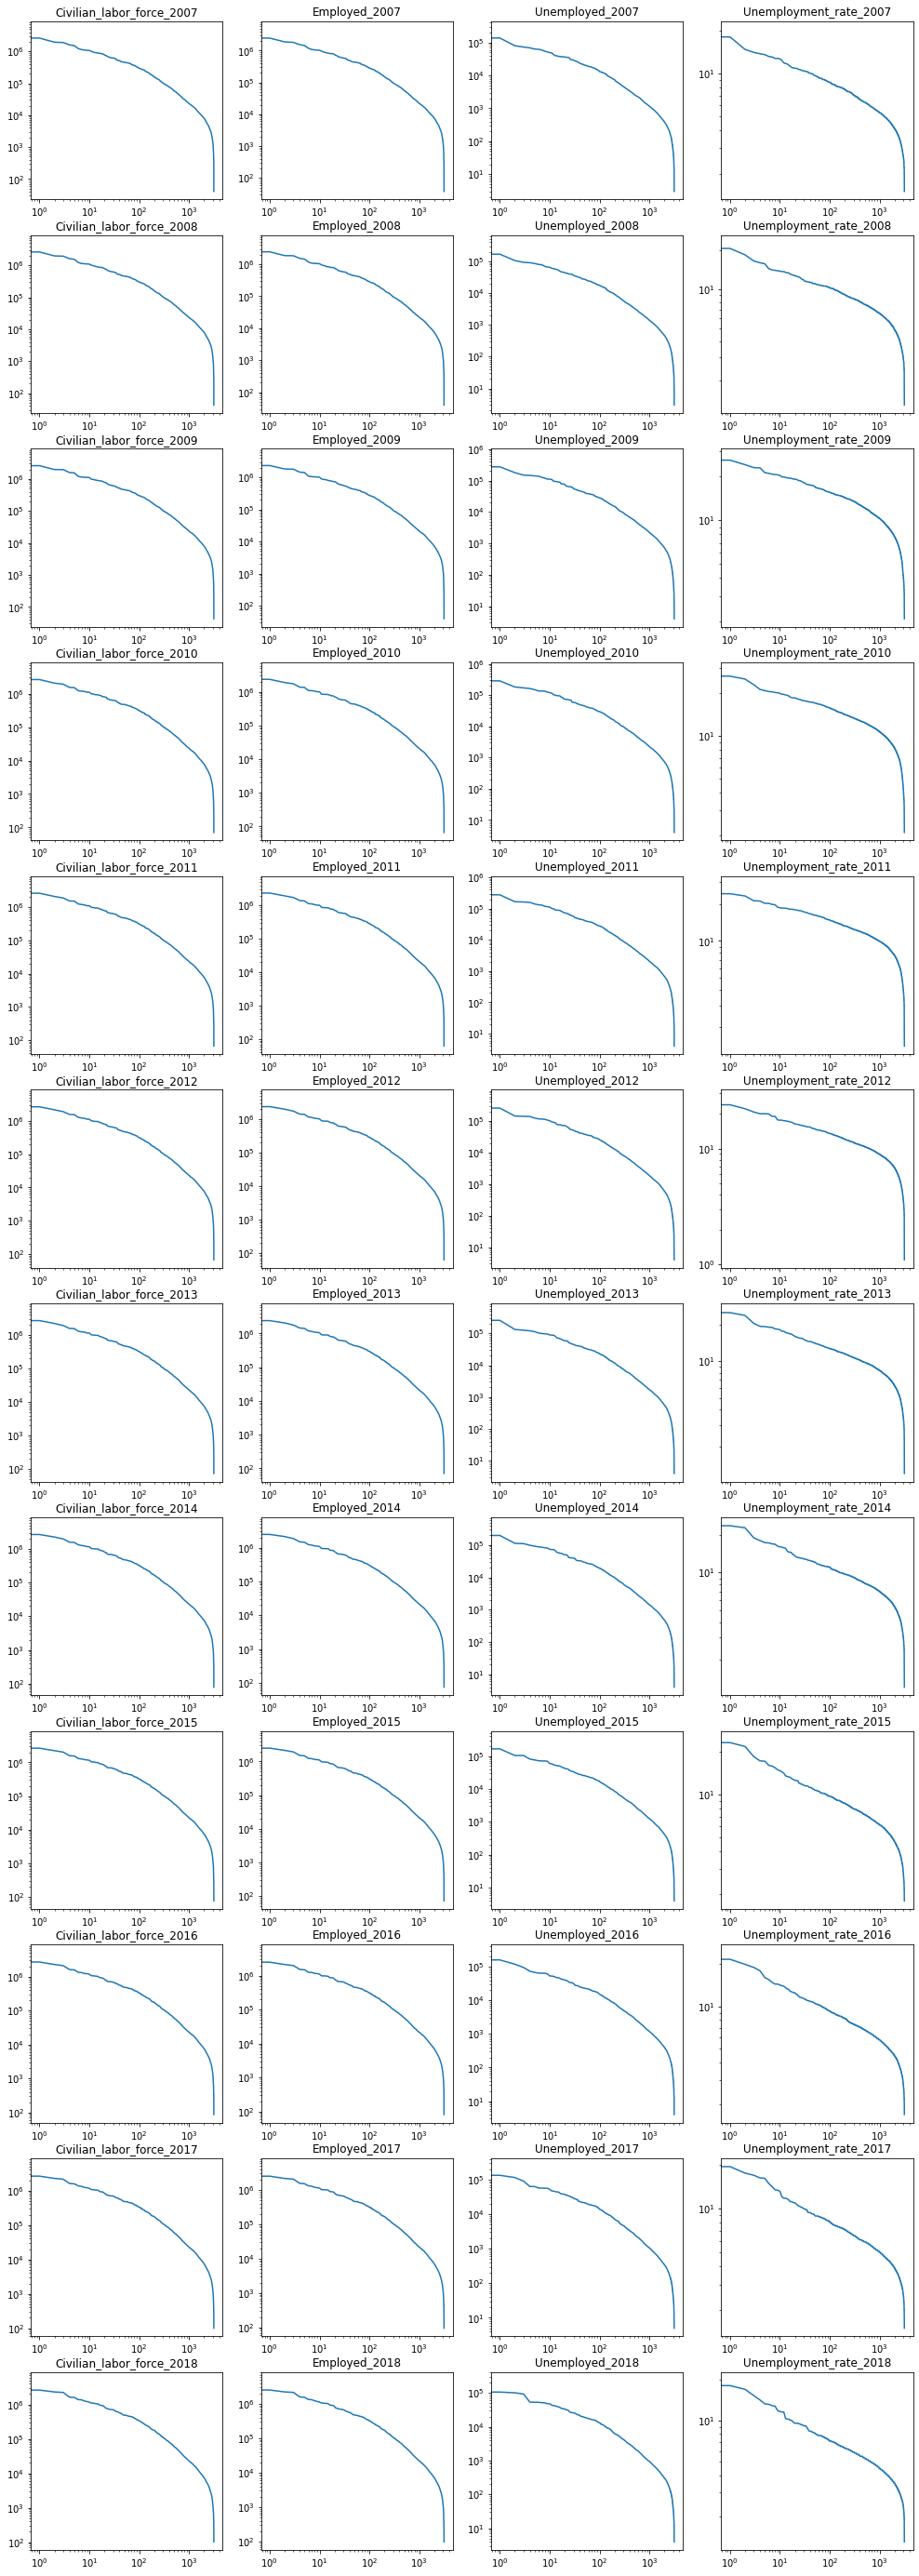

In [23]:
column_names = ['Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007', 'Unemployment_rate_2007', 
                'Civilian_labor_force_2008','Employed_2008', 'Unemployed_2008', 'Unemployment_rate_2008', 
                'Civilian_labor_force_2009', 'Employed_2009', 'Unemployed_2009', 'Unemployment_rate_2009', 
                'Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010', 'Unemployment_rate_2010', 
               'Civilian_labor_force_2011', 'Employed_2011', 'Unemployed_2011', 'Unemployment_rate_2011',
               'Civilian_labor_force_2012', 'Employed_2012', 'Unemployed_2012', 'Unemployment_rate_2012',
               'Civilian_labor_force_2013', 'Employed_2013', 'Unemployed_2013', 'Unemployment_rate_2013',
               'Civilian_labor_force_2014', 'Employed_2014', 'Unemployed_2014', 'Unemployment_rate_2014',
               'Civilian_labor_force_2015', 'Employed_2015', 'Unemployed_2015', 'Unemployment_rate_2015',
               'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016', 'Unemployment_rate_2016',
               'Civilian_labor_force_2017', 'Employed_2017', 'Unemployed_2017', 'Unemployment_rate_2017',
               'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018',]
plot_log(df_une, column_names = column_names, rows = 12, cols = 4, kind='line')

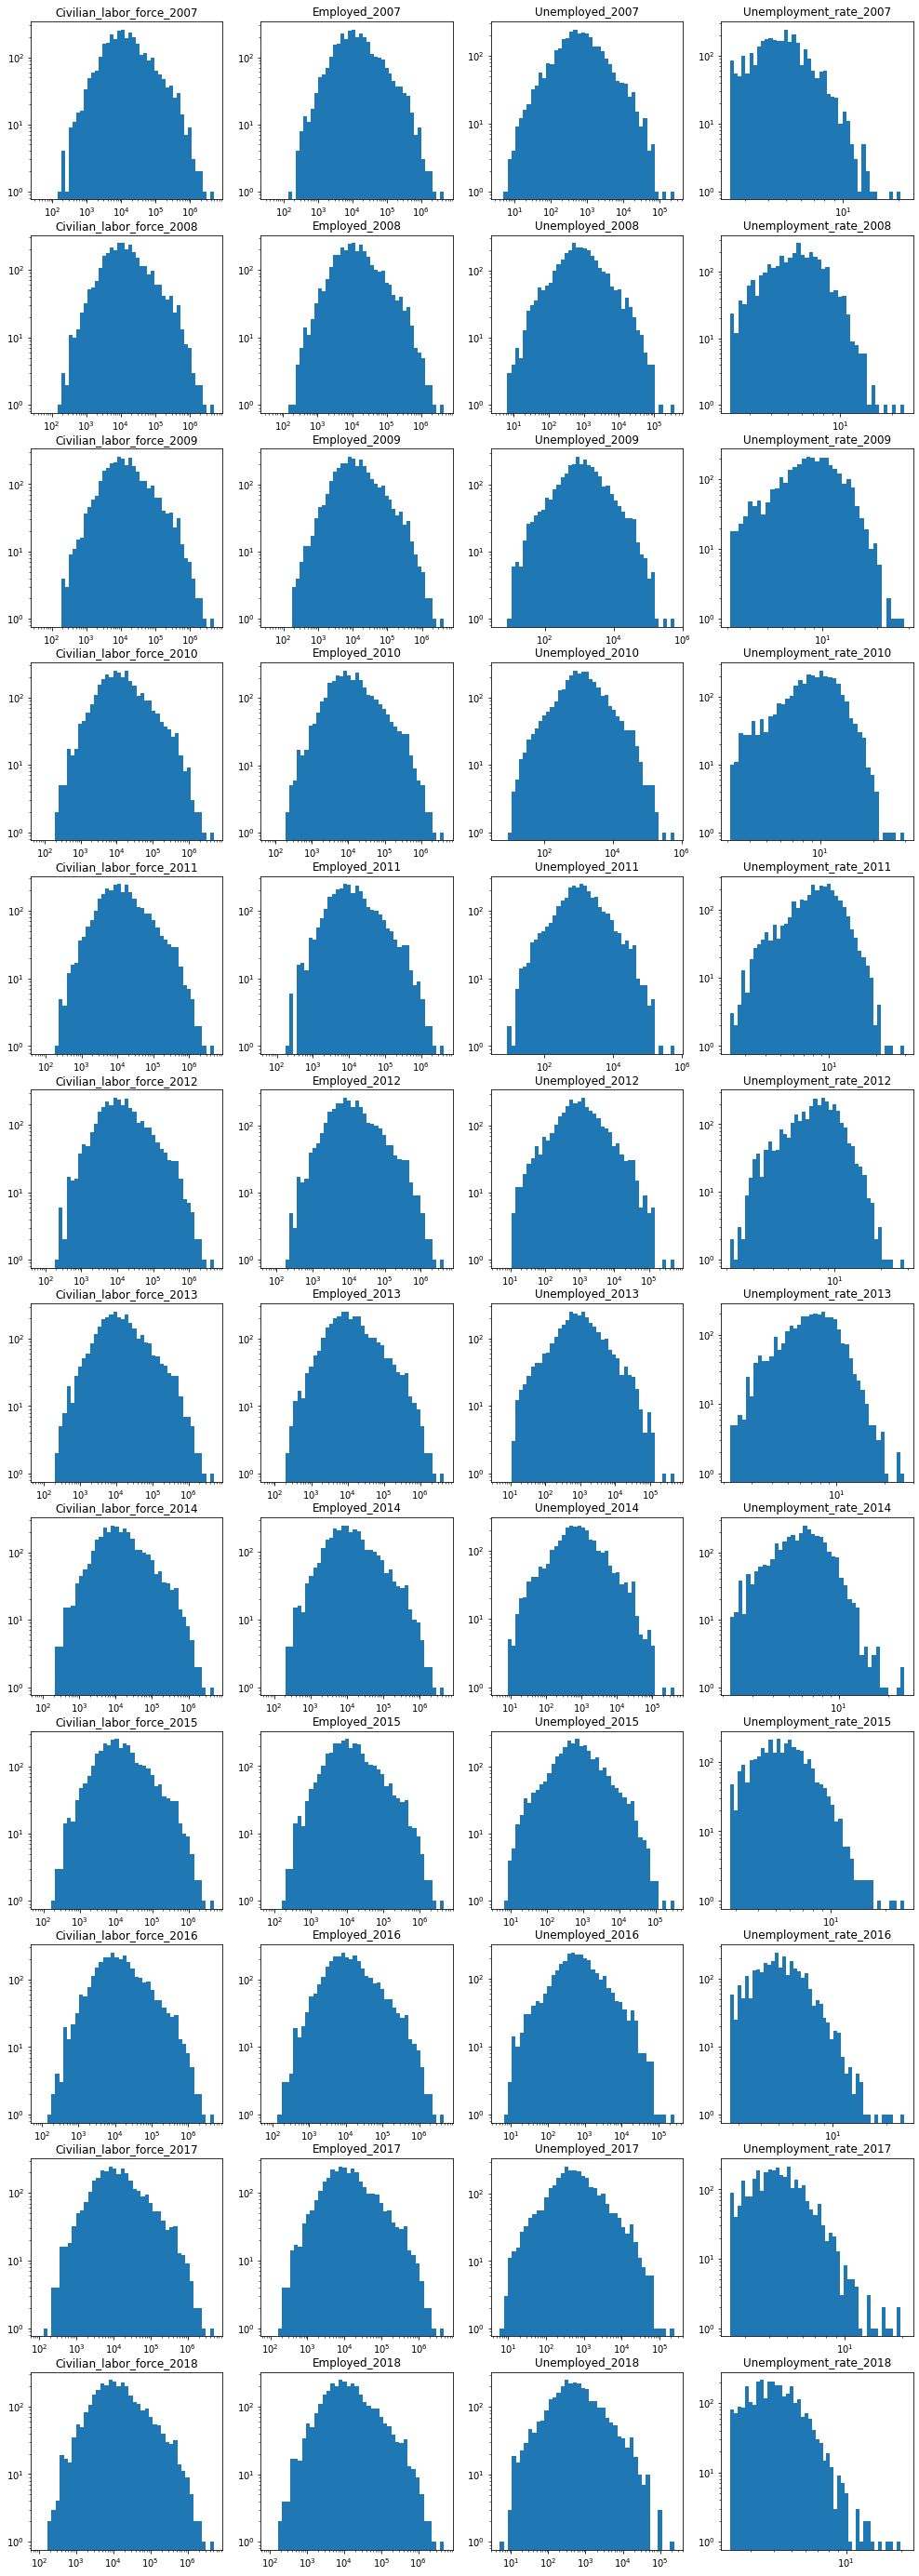

In [24]:
column_names = ['Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007', 'Unemployment_rate_2007', 
                'Civilian_labor_force_2008','Employed_2008', 'Unemployed_2008', 'Unemployment_rate_2008', 
                'Civilian_labor_force_2009', 'Employed_2009', 'Unemployed_2009', 'Unemployment_rate_2009', 
                'Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010', 'Unemployment_rate_2010', 
               'Civilian_labor_force_2011', 'Employed_2011', 'Unemployed_2011', 'Unemployment_rate_2011',
               'Civilian_labor_force_2012', 'Employed_2012', 'Unemployed_2012', 'Unemployment_rate_2012',
               'Civilian_labor_force_2013', 'Employed_2013', 'Unemployed_2013', 'Unemployment_rate_2013',
               'Civilian_labor_force_2014', 'Employed_2014', 'Unemployed_2014', 'Unemployment_rate_2014',
               'Civilian_labor_force_2015', 'Employed_2015', 'Unemployed_2015', 'Unemployment_rate_2015',
               'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016', 'Unemployment_rate_2016',
               'Civilian_labor_force_2017', 'Employed_2017', 'Unemployed_2017', 'Unemployment_rate_2017',
               'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018',]
plot_log(df_une, column_names = column_names, rows = 12, cols = 4, kind='histogram')

[Text(0.5, 1.0, 'Median Household Income in US counties in 2017 sorted in descending order')]

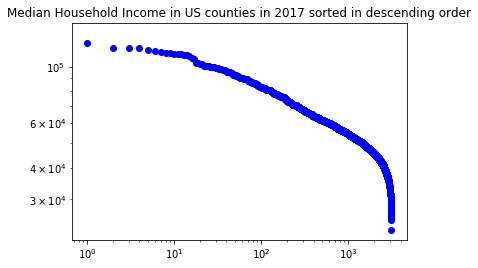

In [25]:
# Arrange and plot the median household income
data = df_une[['Median_Household_Income_2017']].sort_values(by='Median_Household_Income_2017', ascending=False)
idx = [indx for indx in range(len(data))]
fig, ax = plt.subplots()
ax.plot(idx, data['Median_Household_Income_2017'],'ob')
ax.set_yscale("log")
ax.set_xscale("log")
ax.set(title='Median Household Income in US counties in 2017 sorted in descending order')

### Plot the top 20 median household incomes

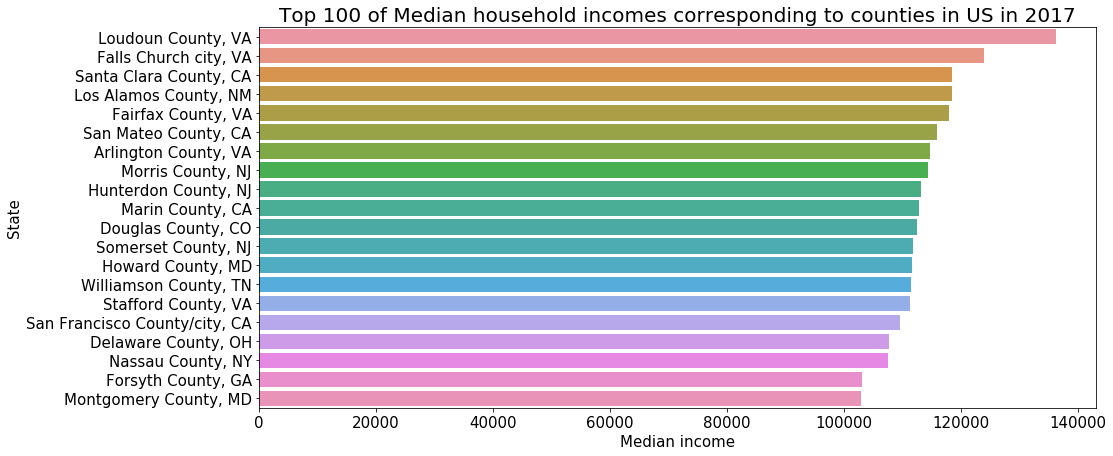

In [26]:
df_income = df_une.sort_values(by='Median_Household_Income_2017', ascending=False)
df_income['State_and_area_name'] = df_income['Area_name']+', '+df_income['State']
f, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(x="Median_Household_Income_2017", y="State_and_area_name", data=df_income.head(20))
bar.set_title("Top 100 of Median household incomes corresponding to counties in US in 2017", fontsize=20)
bar.set_xlabel("Median income",fontsize=15)
bar.set_ylabel("State",fontsize=15)
bar.tick_params(labelsize=15)

### Plot the bottom 20 median household incomes

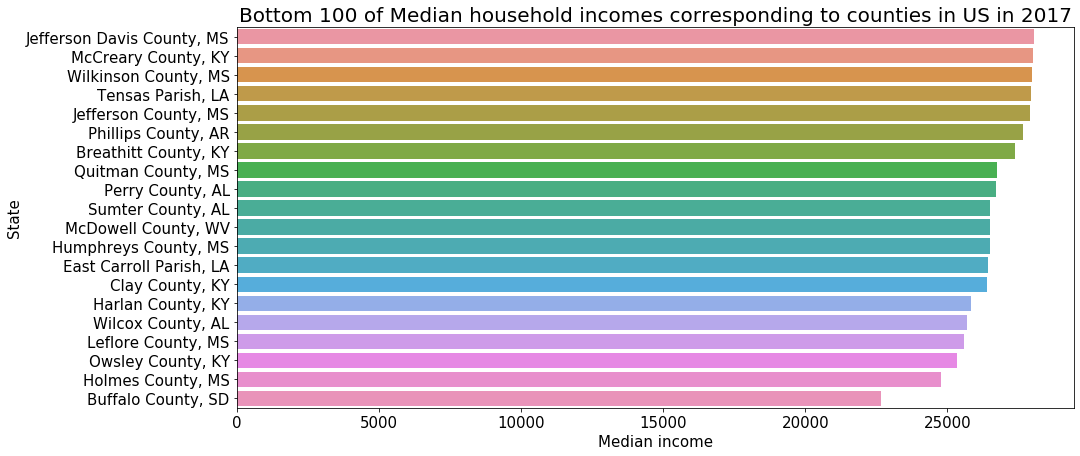

In [27]:
df_income = df_une.sort_values(by='Median_Household_Income_2017', ascending=False)
df_income['State_and_area_name'] = df_income['Area_name']+', '+df_income['State']
f, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(x="Median_Household_Income_2017", y="State_and_area_name", data=df_income.tail(20))
bar.set_title("Bottom 100 of Median household incomes corresponding to counties in US in 2017", fontsize=20)
bar.set_xlabel("Median income",fontsize=15)
bar.set_ylabel("State",fontsize=15)
bar.tick_params(labelsize=15)

### Plot the top 20 Employed in 2017

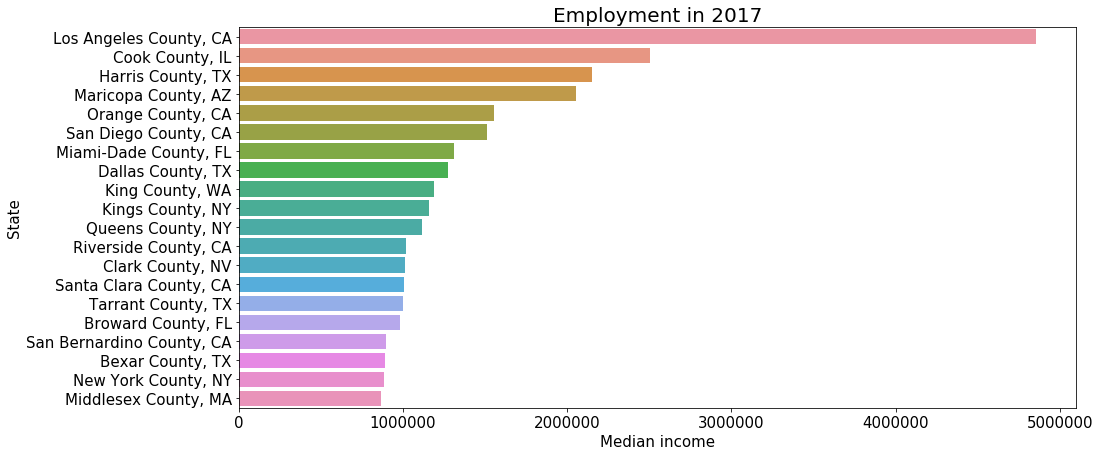

In [28]:
df_income = df_une.sort_values(by='Employed_2017', ascending=False)
df_income['State_and_area_name'] = df_income['Area_name']+', '+df_income['State']
f, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(x="Employed_2017", y="State_and_area_name", data=df_income.head(20))
bar.set_title("Employment in 2017", fontsize=20)
bar.set_xlabel("Median income",fontsize=15)
bar.set_ylabel("State",fontsize=15)
bar.tick_params(labelsize=15)

### Plot the top 20 Unemployment rate in 2017

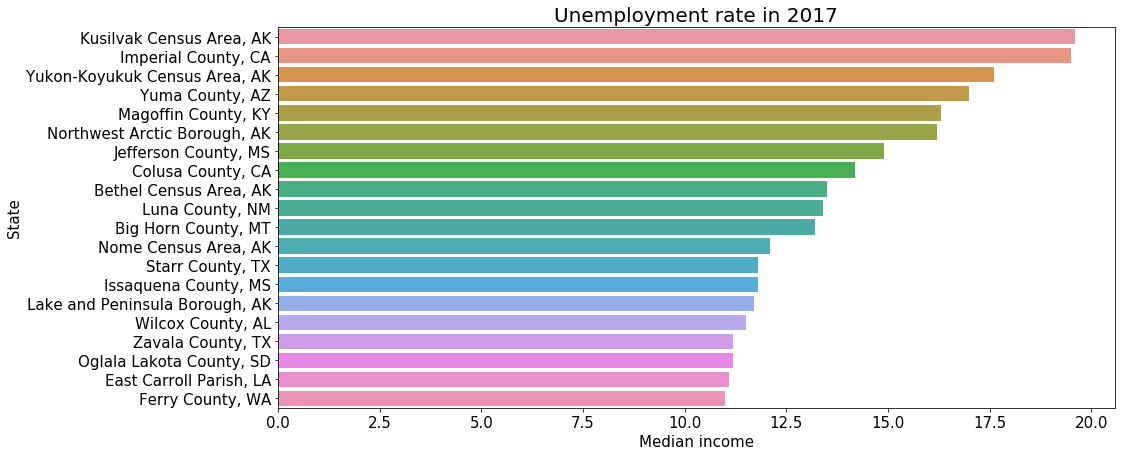

In [29]:
df_income = df_une.sort_values(by='Unemployment_rate_2017', ascending=False)
df_income['State_and_area_name'] = df_income['Area_name']+', '+df_income['State']
f, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(x="Unemployment_rate_2017", y="State_and_area_name", data=df_income.head(20))
bar.set_title("Unemployment rate in 2017", fontsize=20)
bar.set_xlabel("Median income",fontsize=15)
bar.set_ylabel("State",fontsize=15)
bar.tick_params(labelsize=15)

[Text(0.5, 1.0, 'Median_Household_Income_2017')]

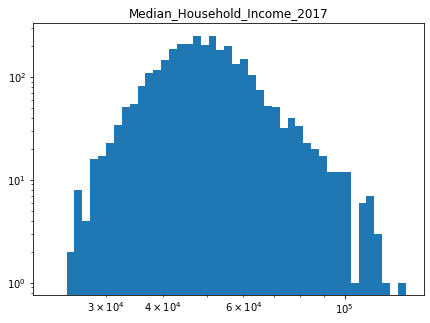

In [30]:
fig, temp = plt.subplots(figsize=(7,5))
data = np.sort(df_une['Median_Household_Income_2017'])
_, bins = np.histogram(np.log10(data + 1), bins='auto')
temp.hist(data, bins=10**bins);
temp.set_yscale("log")
temp.set_xscale("log")
temp.set(title='Median_Household_Income_2017')

In [31]:
#df_une.to_csv(r'new_file.csv')

## Scatter plots illustrate the correlation 

In the below analysis, we illustrate the correlation between each variables including Civilian_labor_force_2011, Employed_2011, Unemployed_2011, Unemployment_rate_2011, Civilian_labor_force_2012, Employed_2012, Unemployed_2012, Unemployment_rate_2012, Civilian_labor_force_2013, Employed_2013, Unemployed_2013, Unemployment_rate_2013, Civilian_labor_force_2014, Employed_2014, Unemployed_2014, Unemployment_rate_2014. 

${EmploymentRate} = \frac{Employed \ Workers}{Unemployed \ Workers + Employed \ Workers}$

In [32]:
def plot_regplot(df, column_names):
    f, axes = plt.subplots(2,3, figsize=(17, 11), sharex=False, constrained_layout=True)

    splot1 = sns.regplot(x=column_names[0], y=column_names[1], data=df, ax = axes[0,0])
    corr, _ = pearsonr(df[column_names[0]], df[column_names[1]])
    splot1.text(10, 4000000,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_1 = rsquared(df[column_names[0]], df[column_names[1]])
    splot1.text(10, 3500000,'$r^2$: %.3f' % r2_1, fontsize=13)
    
    splot2 = sns.regplot(x=column_names[0], y=column_names[2], data=df, ax = axes[0,1])
    corr, _ = pearsonr(df[column_names[0]], df[column_names[2]])
    splot2.text(10, 200000,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_2 = rsquared(df[column_names[0]], df[column_names[2]])
    splot2.text(10, 150000,'$r^2$: %.3f' % r2_2, fontsize=13)
    
    splot3 = sns.regplot(x=column_names[0], y=column_names[3], data=df, ax = axes[0,2])
    corr, _ = pearsonr(df[column_names[0]], df[column_names[3]])
    splot3.text(1000000, 15,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_3 = rsquared(df[column_names[0]], df[column_names[3]])
    splot3.text(1000000, 10,'$r^2$: %.3f' % r2_3, fontsize=13)
    
    splot4 = sns.regplot(x=column_names[1], y=column_names[2], data=df, ax = axes[1,0])
    corr, _ = pearsonr(df[column_names[1]], df[column_names[2]])
    splot4.text(10, 150000,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_4 = rsquared(df[column_names[1]], df[column_names[2]])
    splot4.text(10, 100000,'$r^2$: %.3f' % r2_4, fontsize=13)
    
    splot5 = sns.regplot(x=column_names[1], y=column_names[3], data=df, ax = axes[1,1])
    corr, _ = pearsonr(df[column_names[1]], df[column_names[3]])
    splot5.text(1000000, 15,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_5 = rsquared(df[column_names[1]], df[column_names[3]])
    splot5.text(1000000, 10,'$r^2$: %.3f' % r2_5, fontsize=13)
    
    splot6 = sns.regplot(x=column_names[2], y=column_names[3], data=df, ax = axes[1,2])
    corr, _ = pearsonr(df[column_names[2]], df[column_names[3]])
    splot6.text(10, 30000,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_6 = rsquared(df[column_names[2]], df[column_names[3]])
    splot6.text(10, 20000,'$r^2$: %.3f' % r2_6, fontsize=13)

Two functions below aim at computing the R-square. 

In [33]:
r2 = r2_score(df_une['Civilian_labor_force_2007'], df_une['Employed_2007'])
r2

0.997515999528798

In [34]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

In [35]:
rsquared(df_une['Civilian_labor_force_2007'], df_une['Employed_2007'])

0.9998919626826989

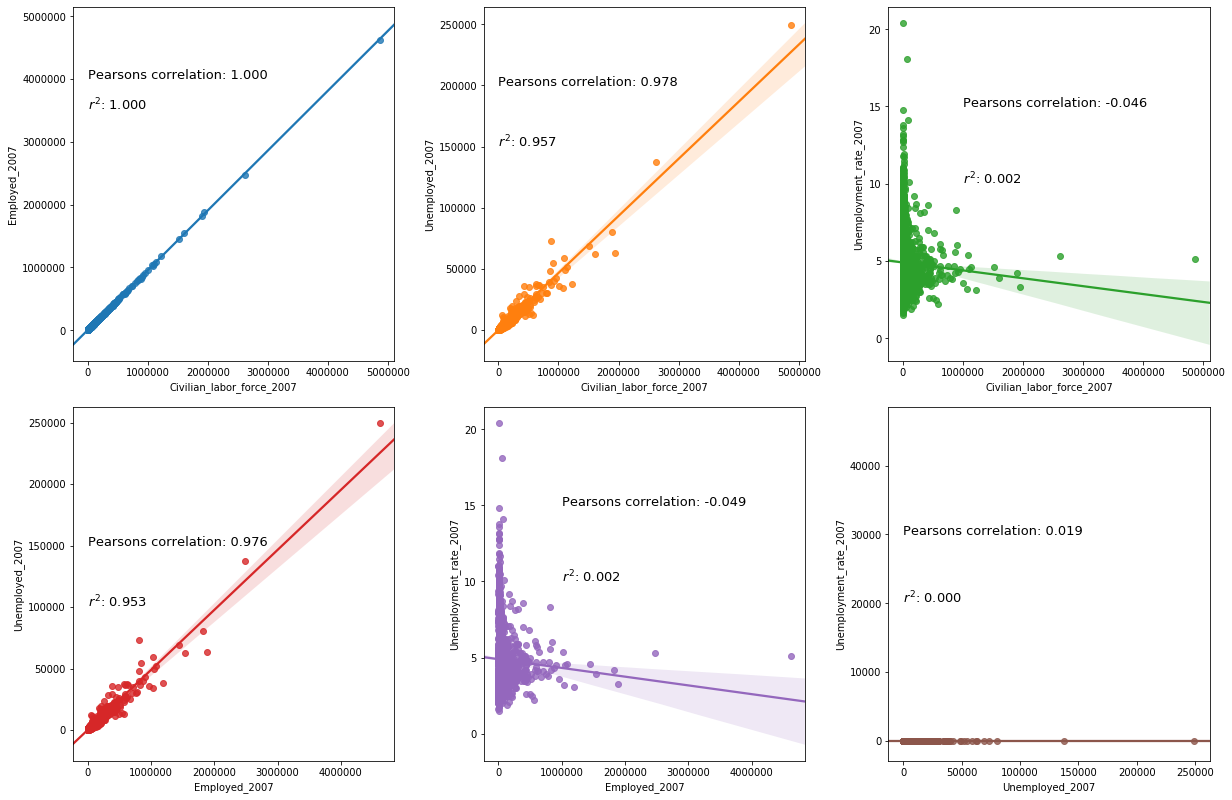

In [36]:
column_names = ['Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007', 'Unemployment_rate_2007']
plot_regplot(df_une, column_names=column_names)

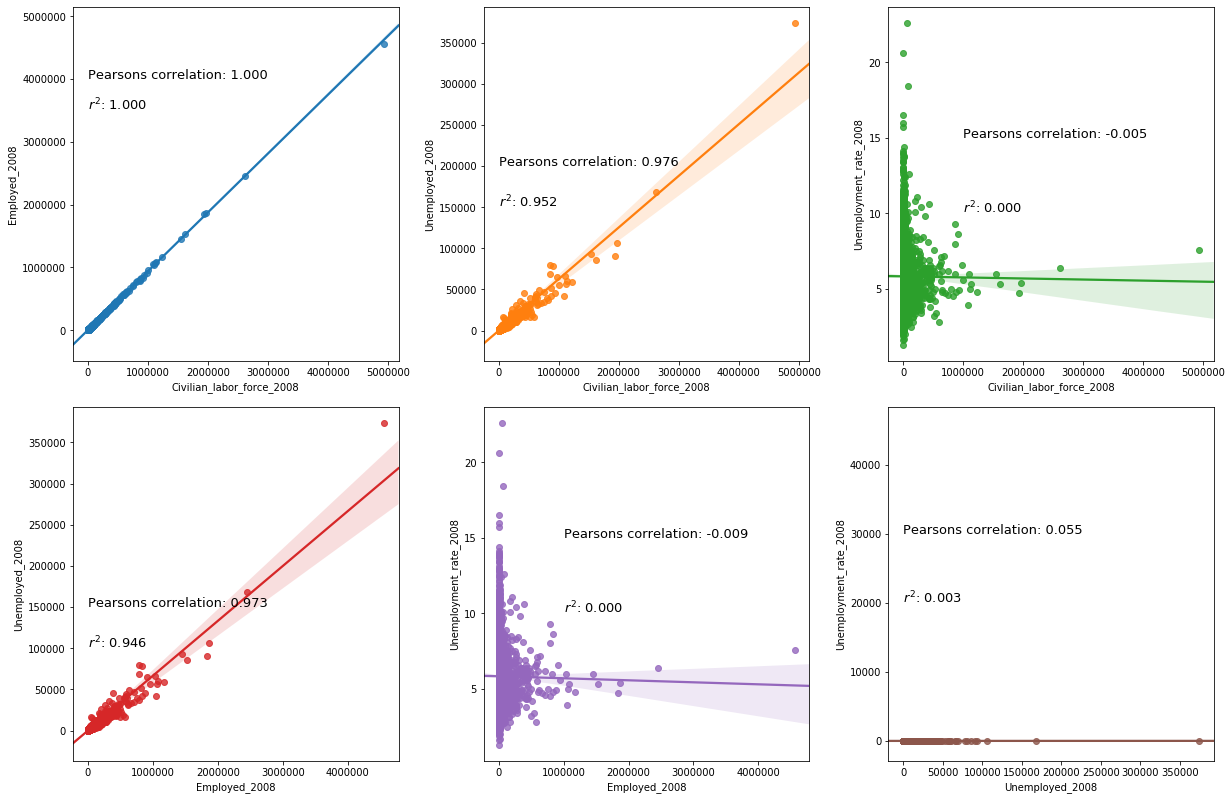

In [37]:
column_names = ['Civilian_labor_force_2008', 'Employed_2008', 'Unemployed_2008', 'Unemployment_rate_2008']
plot_regplot(df_une, column_names=column_names)

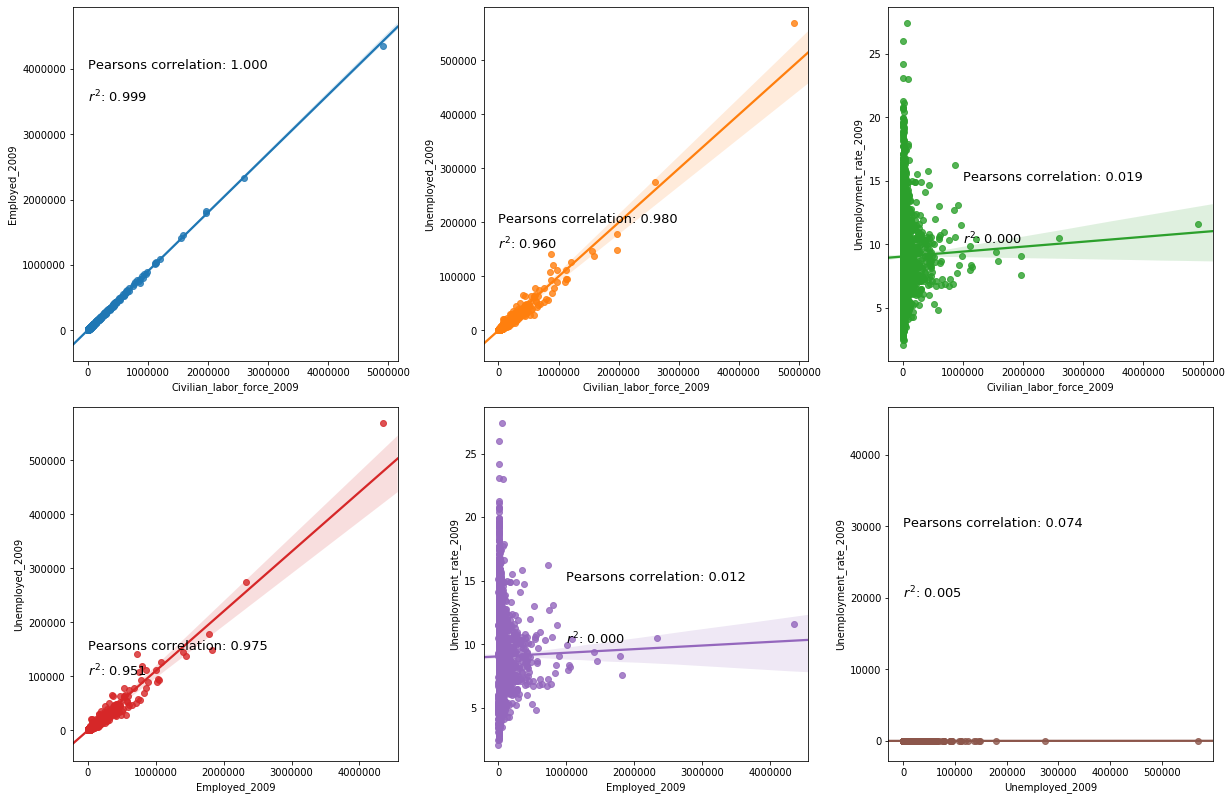

In [38]:
column_names = ['Civilian_labor_force_2009', 'Employed_2009', 'Unemployed_2009', 'Unemployment_rate_2009']
plot_regplot(df_une, column_names=column_names)

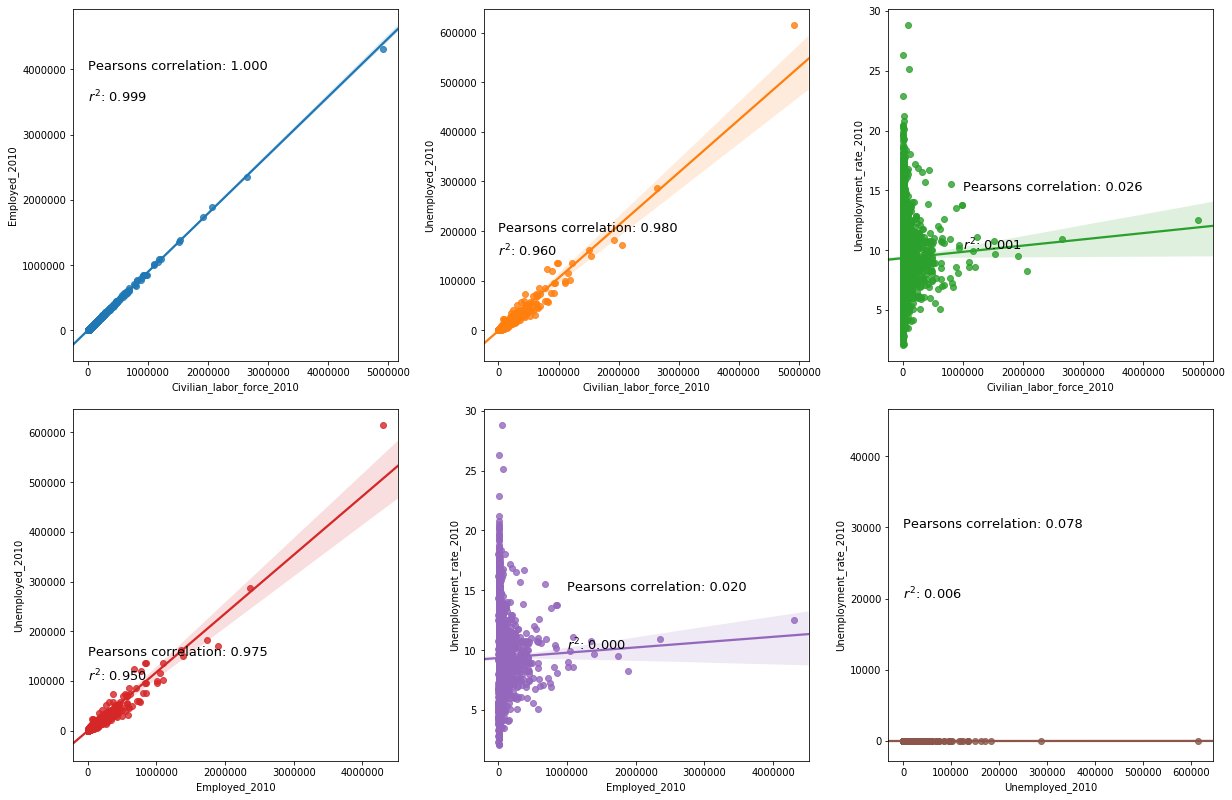

In [39]:
column_names = ['Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010', 'Unemployment_rate_2010']
plot_regplot(df_une, column_names=column_names)

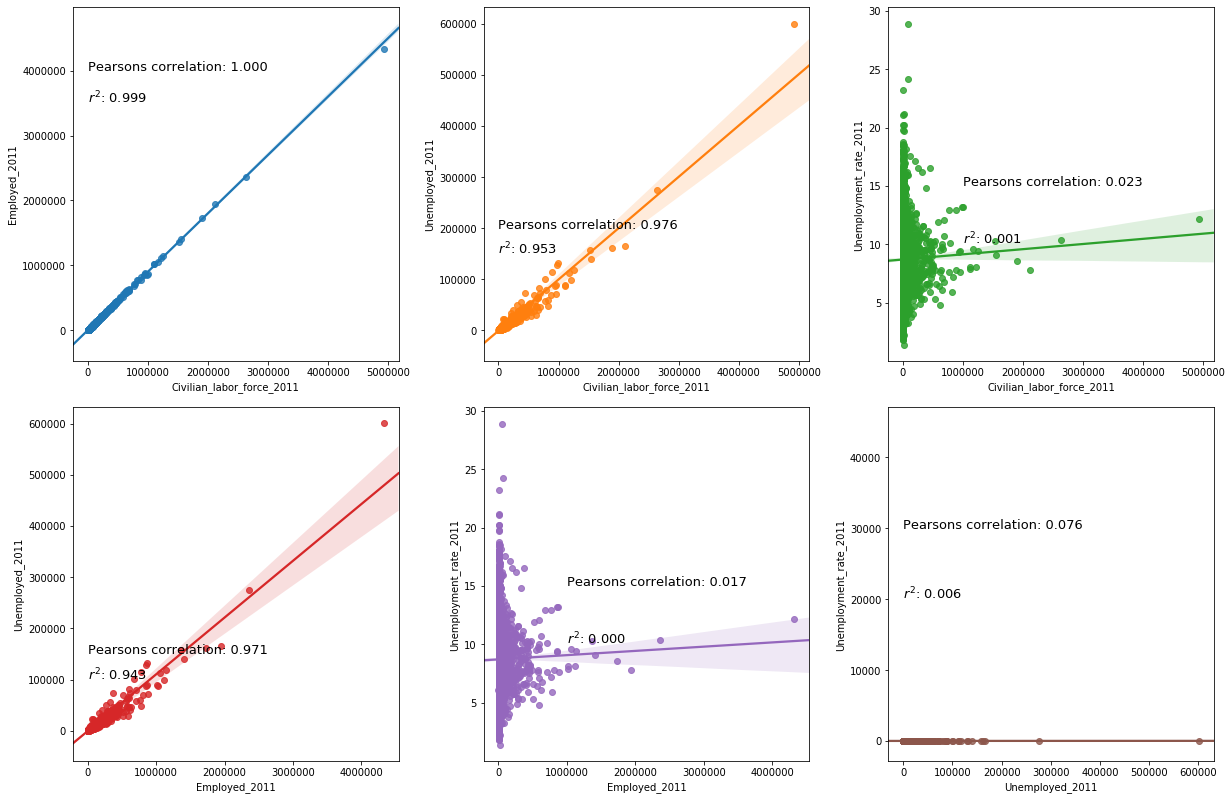

In [40]:
column_names = ['Civilian_labor_force_2011', 'Employed_2011', 'Unemployed_2011', 'Unemployment_rate_2011']
plot_regplot(df_une, column_names=column_names)

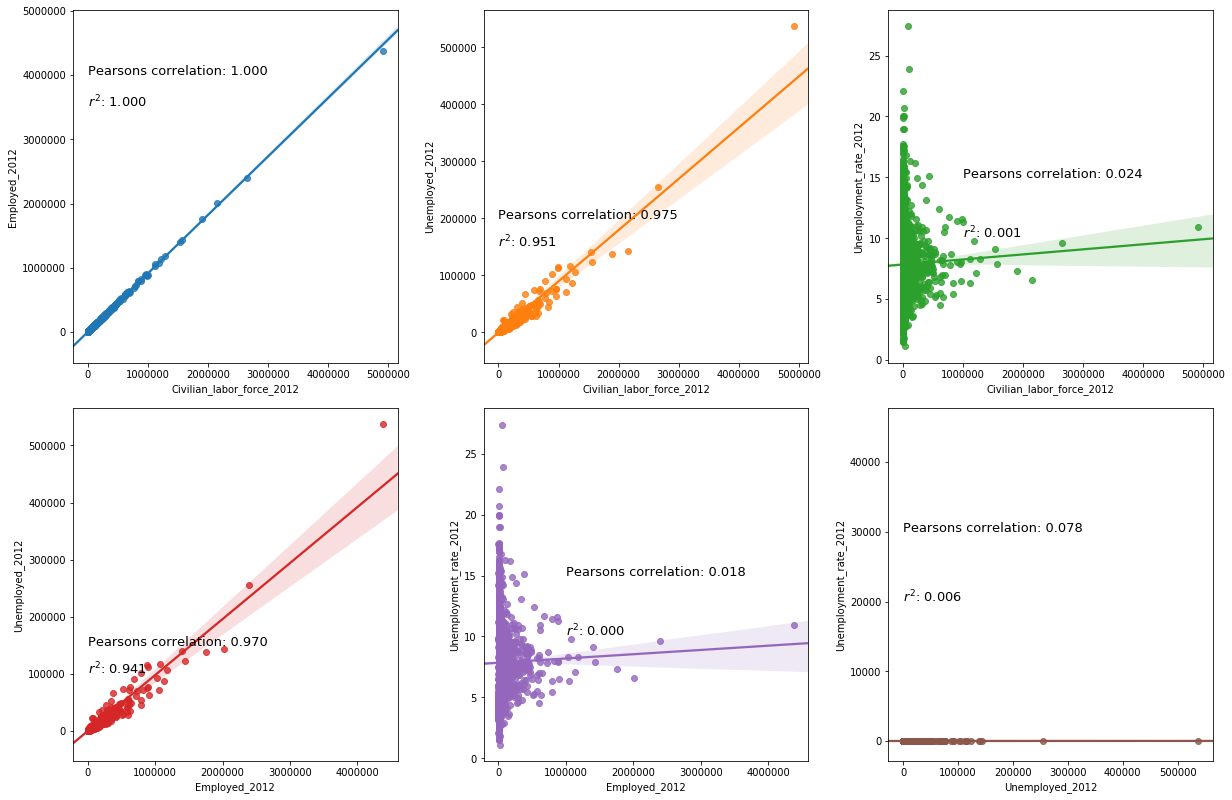

In [41]:
column_names = ['Civilian_labor_force_2012', 'Employed_2012', 'Unemployed_2012', 'Unemployment_rate_2012']
plot_regplot(df_une, column_names=column_names)

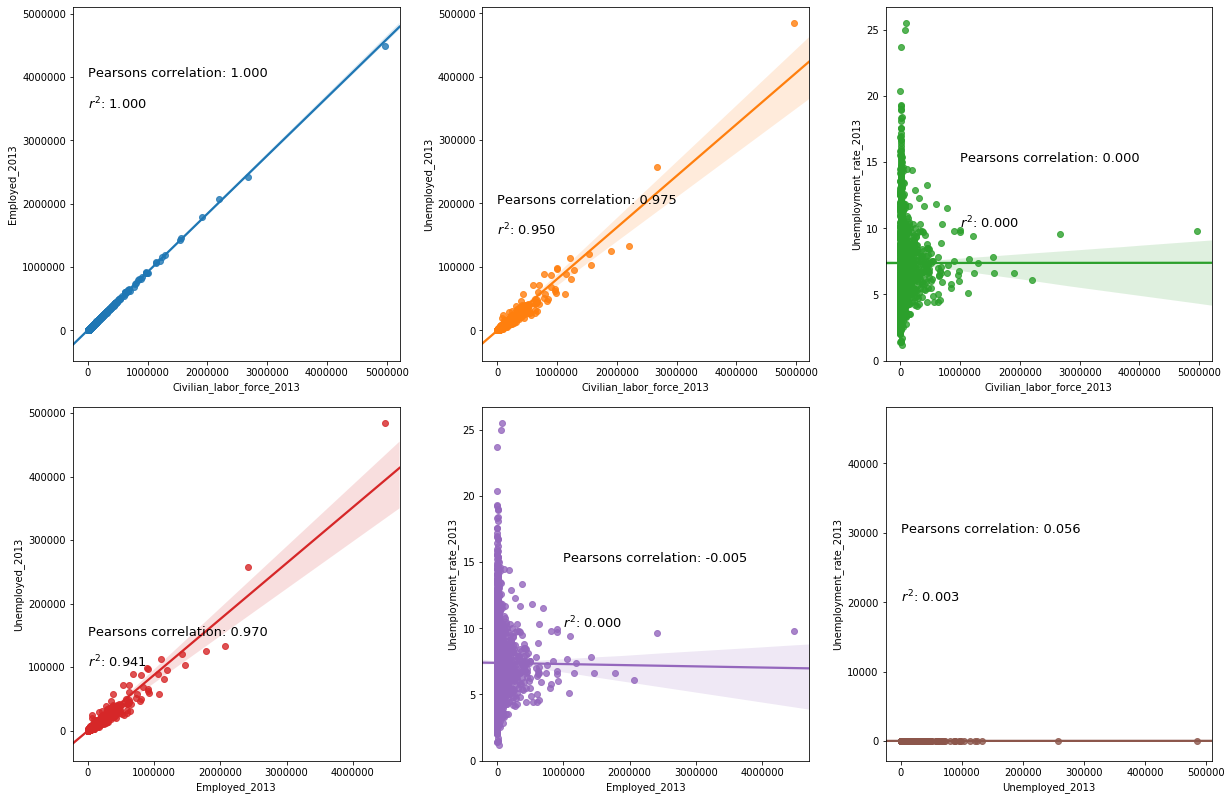

In [42]:
column_names = ['Civilian_labor_force_2013', 'Employed_2013', 'Unemployed_2013', 'Unemployment_rate_2013']
plot_regplot(df_une, column_names=column_names)

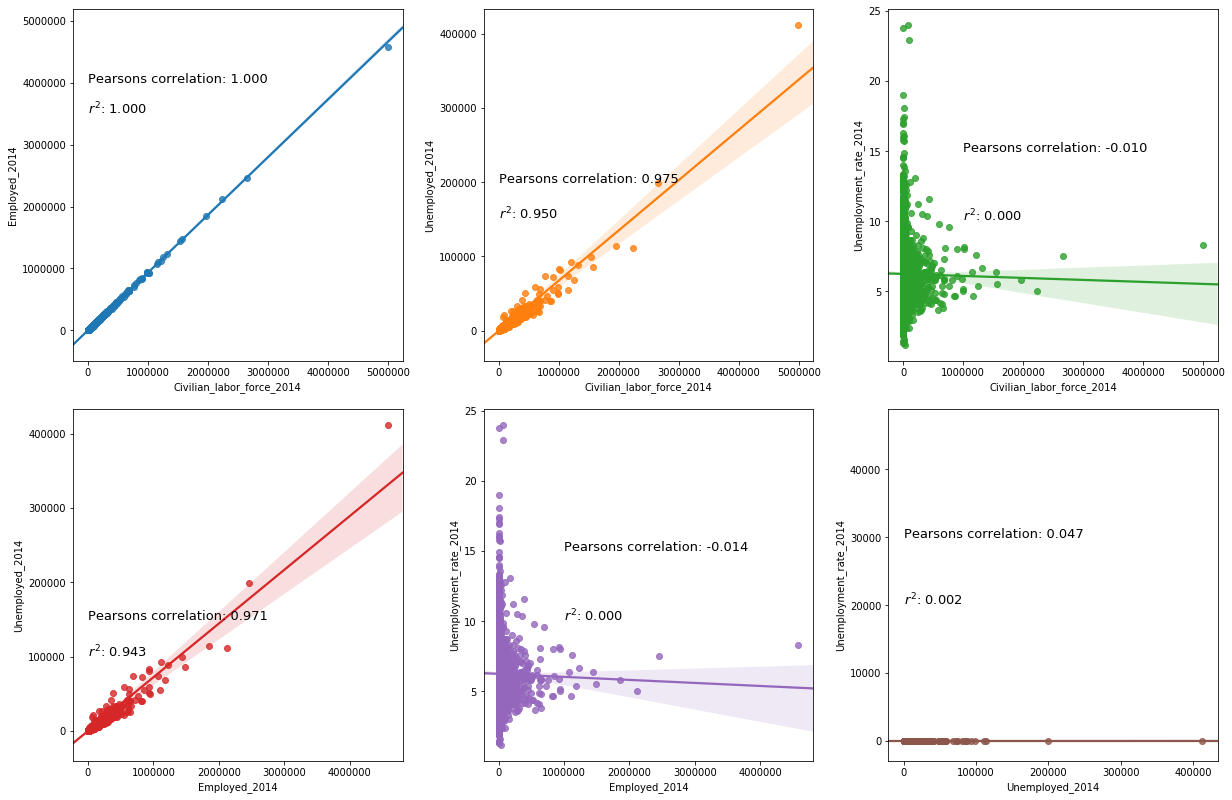

In [43]:
column_names = ['Civilian_labor_force_2014', 'Employed_2014', 'Unemployed_2014', 'Unemployment_rate_2014']
plot_regplot(df_une, column_names=column_names)

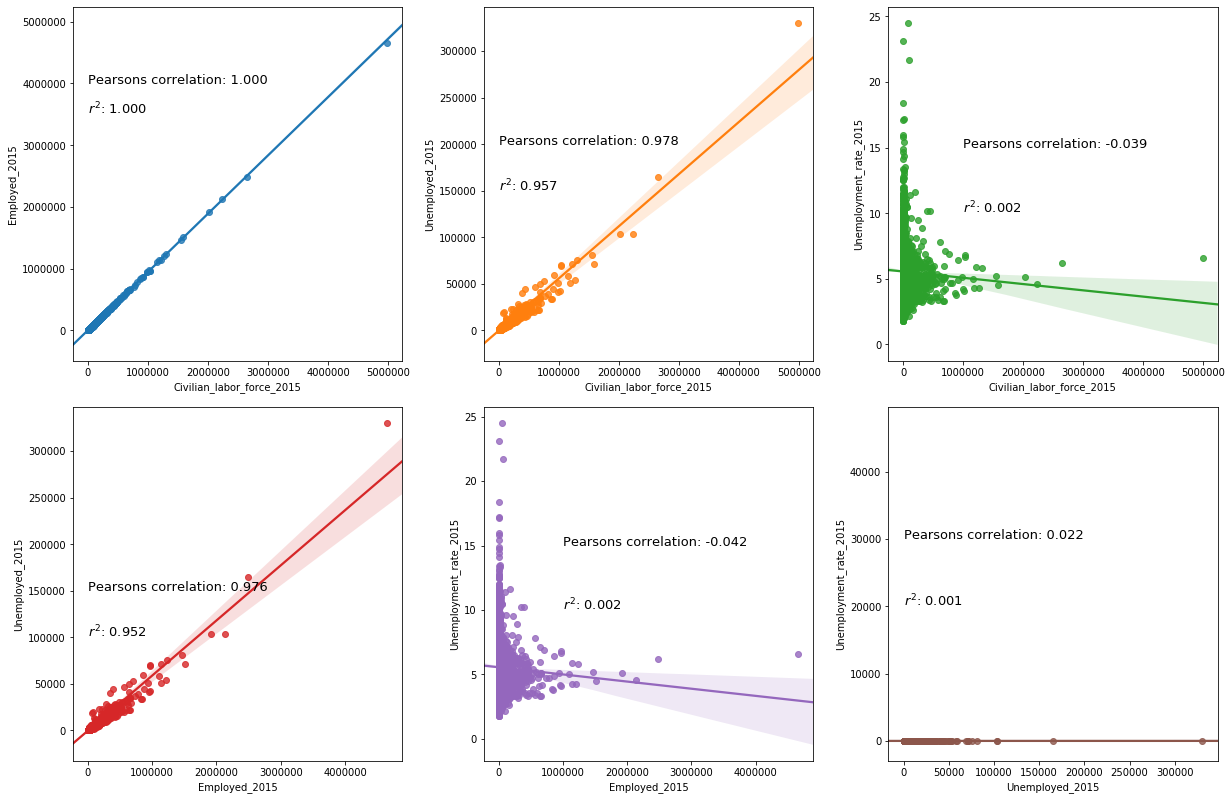

In [44]:
column_names = ['Civilian_labor_force_2015', 'Employed_2015', 'Unemployed_2015', 'Unemployment_rate_2015']
plot_regplot(df_une, column_names=column_names)

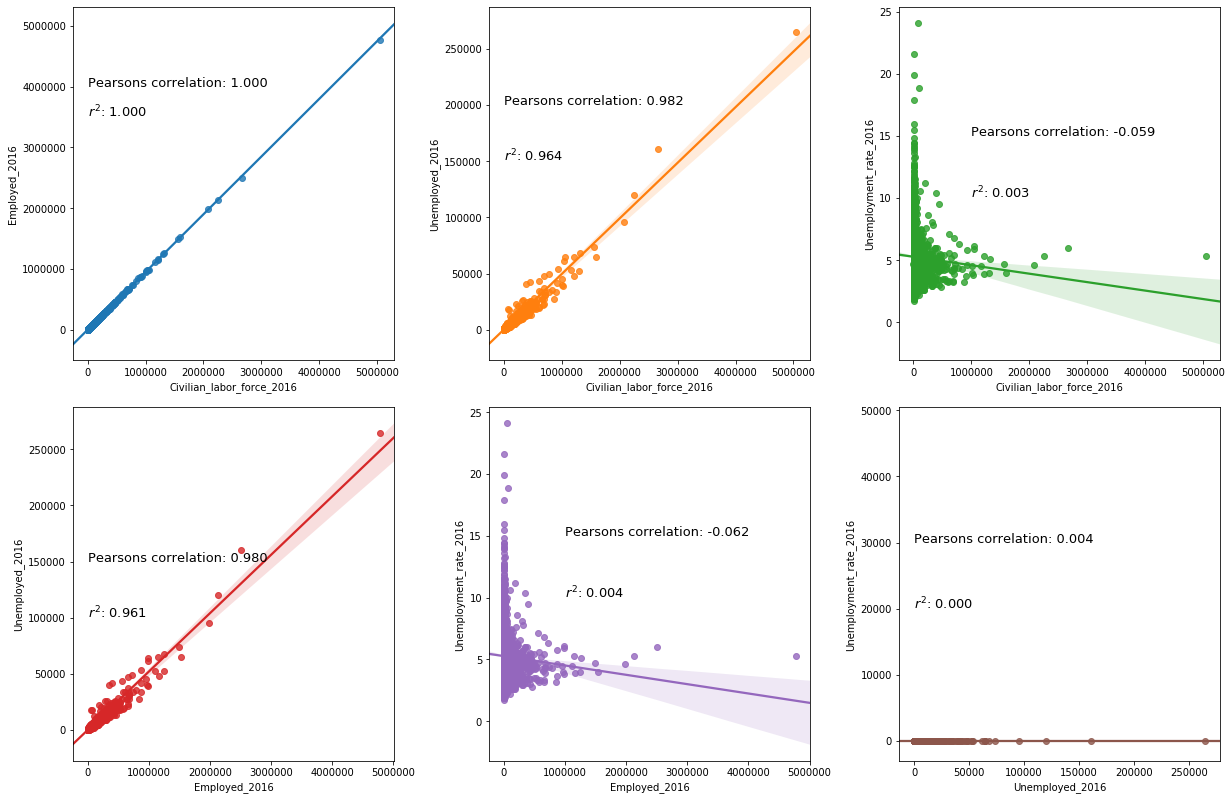

In [45]:
column_names = ['Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016', 'Unemployment_rate_2016']
plot_regplot(df_une, column_names=column_names)

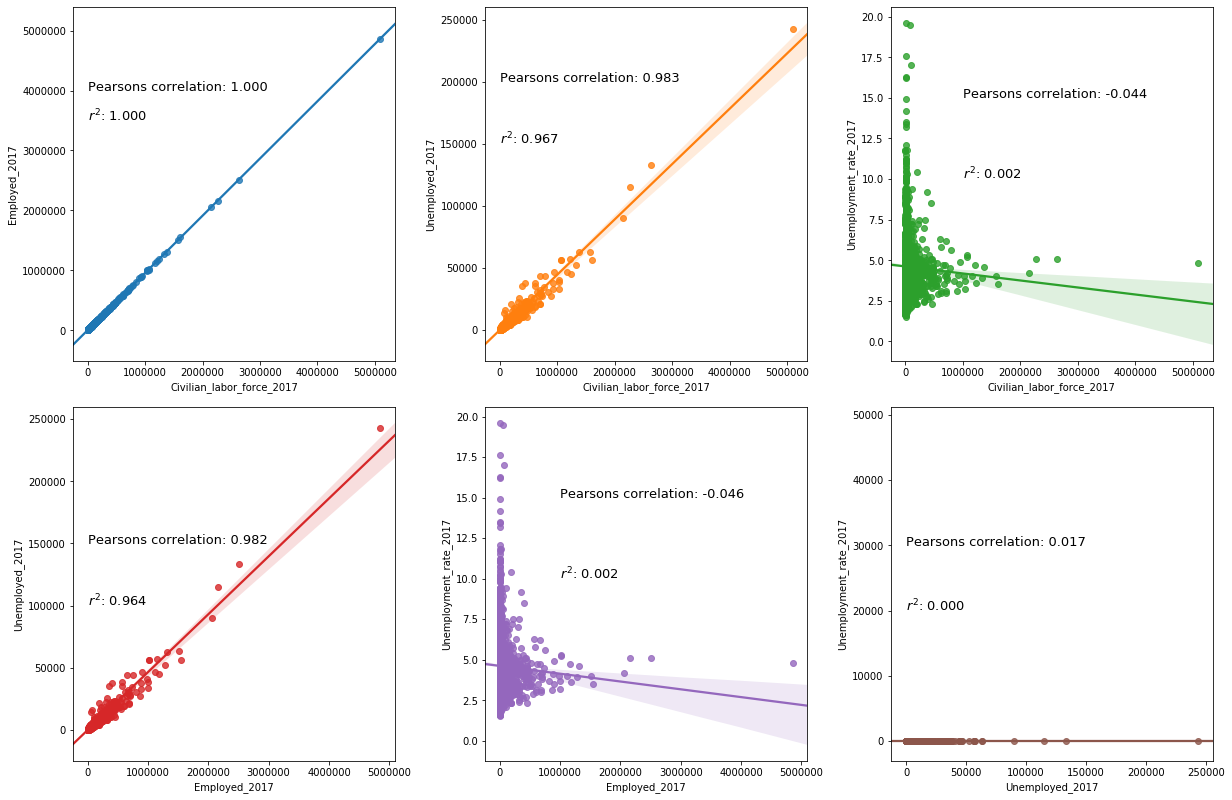

In [46]:
column_names = ['Civilian_labor_force_2017', 'Employed_2017', 'Unemployed_2017', 'Unemployment_rate_2017']
plot_regplot(df_une, column_names=column_names)

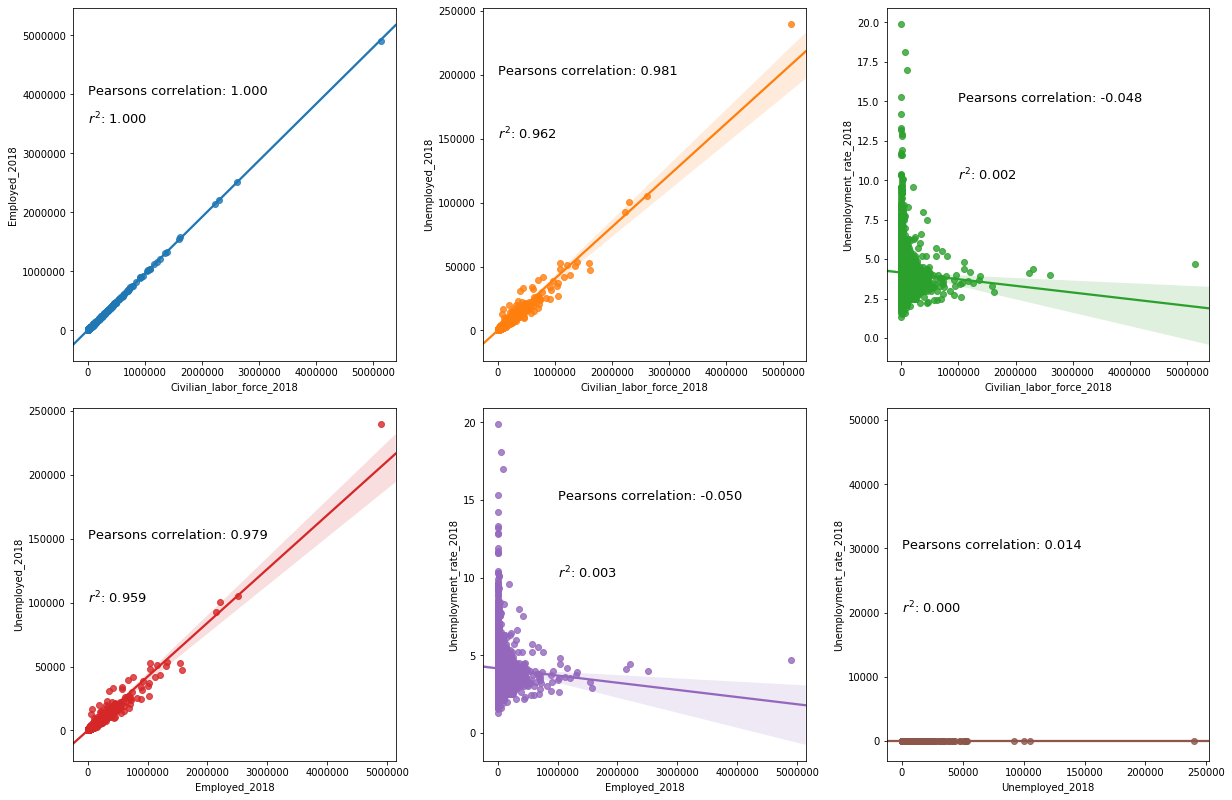

In [47]:
column_names = ['Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018']
plot_regplot(df_une, column_names=column_names)

#### From the above figures, we can see that the more civilian labor force in a county, the higher employed workers and the higher unemployed workers. Unemployment rate has a slight negative correlation with civilian labor foce and employed worker.  

### Plotting correlation of Median_Household_Income_2017 with other variables

In [48]:
def plot_regplot_household(df, column_names):
    f, axes = plt.subplots(2,2, figsize=(10, 5), sharex=False, constrained_layout=True)
    splot1 = sns.regplot(x=column_names[0], y=column_names[1], data=df_une, ax = axes[0,0])
    corr, _ = pearsonr(df[column_names[0]], df[column_names[1]])
    splot1.text(20000, 4000000,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_1 = rsquared(df[column_names[0]], df[column_names[1]])
    splot1.text(20000, 3000000,'$r^2$: %.3f' % r2_1, fontsize=13)
    
    splot2 = sns.regplot(x=column_names[0], y=column_names[2], data=df_une, ax = axes[0,1])
    corr, _ = pearsonr(df[column_names[0]], df[column_names[2]])
    splot2.text(30000, 4000000,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_2 = rsquared(df[column_names[0]], df[column_names[2]])
    splot2.text(30000, 3000000,'$r^2$: %.3f' % r2_2, fontsize=13)
    
    splot3 = sns.regplot(x=column_names[0], y=column_names[3], data=df_une, ax = axes[1,0])
    corr, _ = pearsonr(df[column_names[0]], df[column_names[3]])
    splot3.text(30000, 200000,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_3 = rsquared(df[column_names[0]], df[column_names[3]])
    splot3.text(30000, 150000,'$r^2$: %.3f' % r2_3, fontsize=13)
    
    splot4 = sns.regplot(x=column_names[0], y=column_names[4], data=df_une, ax = axes[1,1])
    corr, _ = pearsonr(df[column_names[0]], df[column_names[4]])
    splot4.text(30000, 40000,'Pearsons correlation: %.3f' % corr, fontsize=13) #add text
    r2_4 = rsquared(df[column_names[0]], df[column_names[4]])
    splot4.text(30000, 30000,'$r^2$: %.3f' % r2_4, fontsize=13)

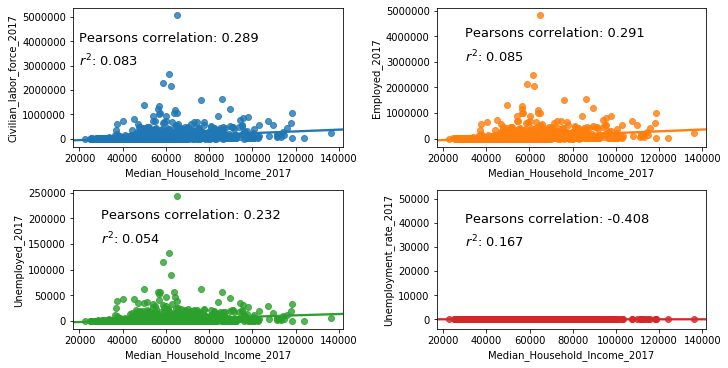

In [49]:
column_name17 = ['Median_Household_Income_2017', 'Civilian_labor_force_2017', 'Employed_2017', 'Unemployed_2017', 'Unemployment_rate_2017']
plot_regplot_household(df_une, column_name17)

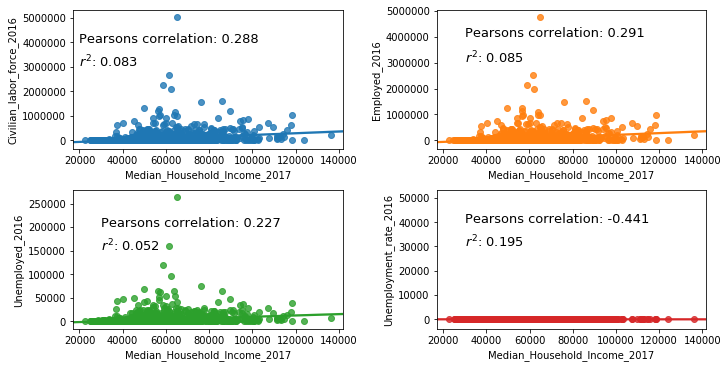

In [50]:
column_name16 = ['Median_Household_Income_2017', 'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016', 'Unemployment_rate_2016']
plot_regplot_household(df_une, column_name16)

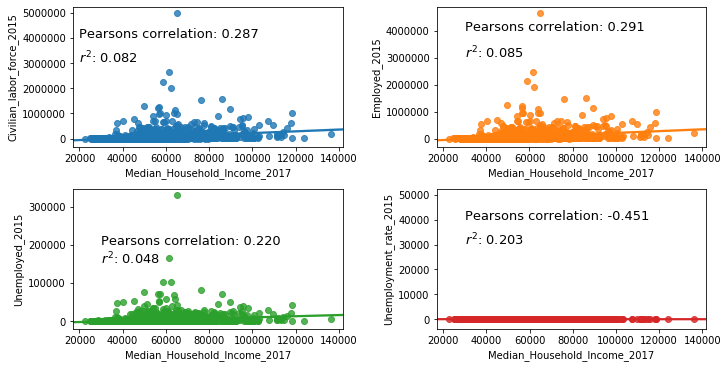

In [51]:
column_names = ['Median_Household_Income_2017', 'Civilian_labor_force_2015', 'Employed_2015', 'Unemployed_2015', 'Unemployment_rate_2015']
plot_regplot_household(df_une, column_names)

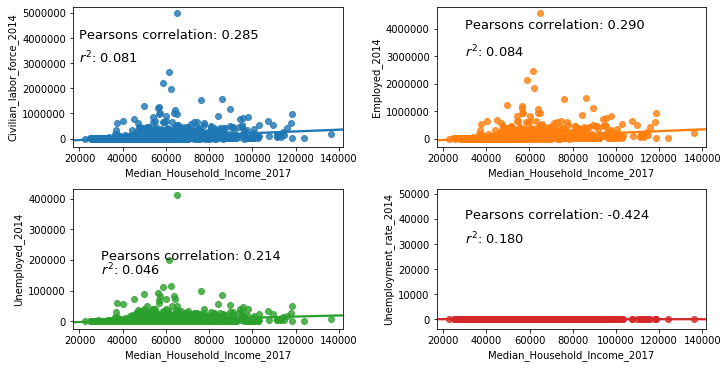

In [52]:
column_names = ['Median_Household_Income_2017', 'Civilian_labor_force_2014', 'Employed_2014', 'Unemployed_2014', 'Unemployment_rate_2014']
plot_regplot_household(df_une, column_names)

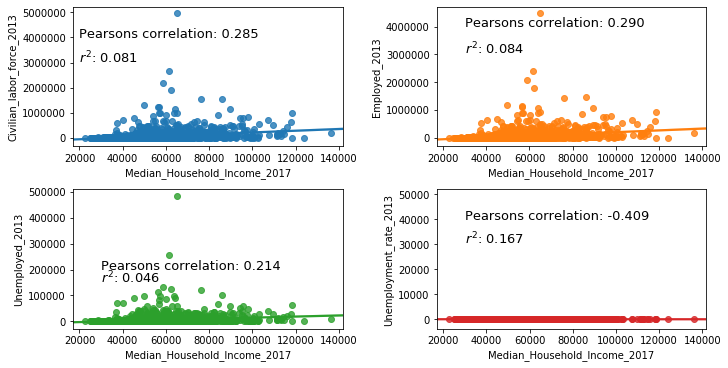

In [53]:
column_names = ['Median_Household_Income_2017', 'Civilian_labor_force_2013', 'Employed_2013', 'Unemployed_2013', 'Unemployment_rate_2013']
plot_regplot_household(df_une, column_names)

In [54]:
def plot_violin(df, column_names, rows, cols):
    f, axes = plt.subplots(rows, cols, figsize=(20, 35), sharex=False, constrained_layout=True)
    i = 0
    for r in range(rows):
        if i == len(column_names):
            break
            
        for c in range(cols):
            ax = sns.violinplot(x=df[column_names[i]], ax = axes[r,c])
            i += 1
    plt.show()

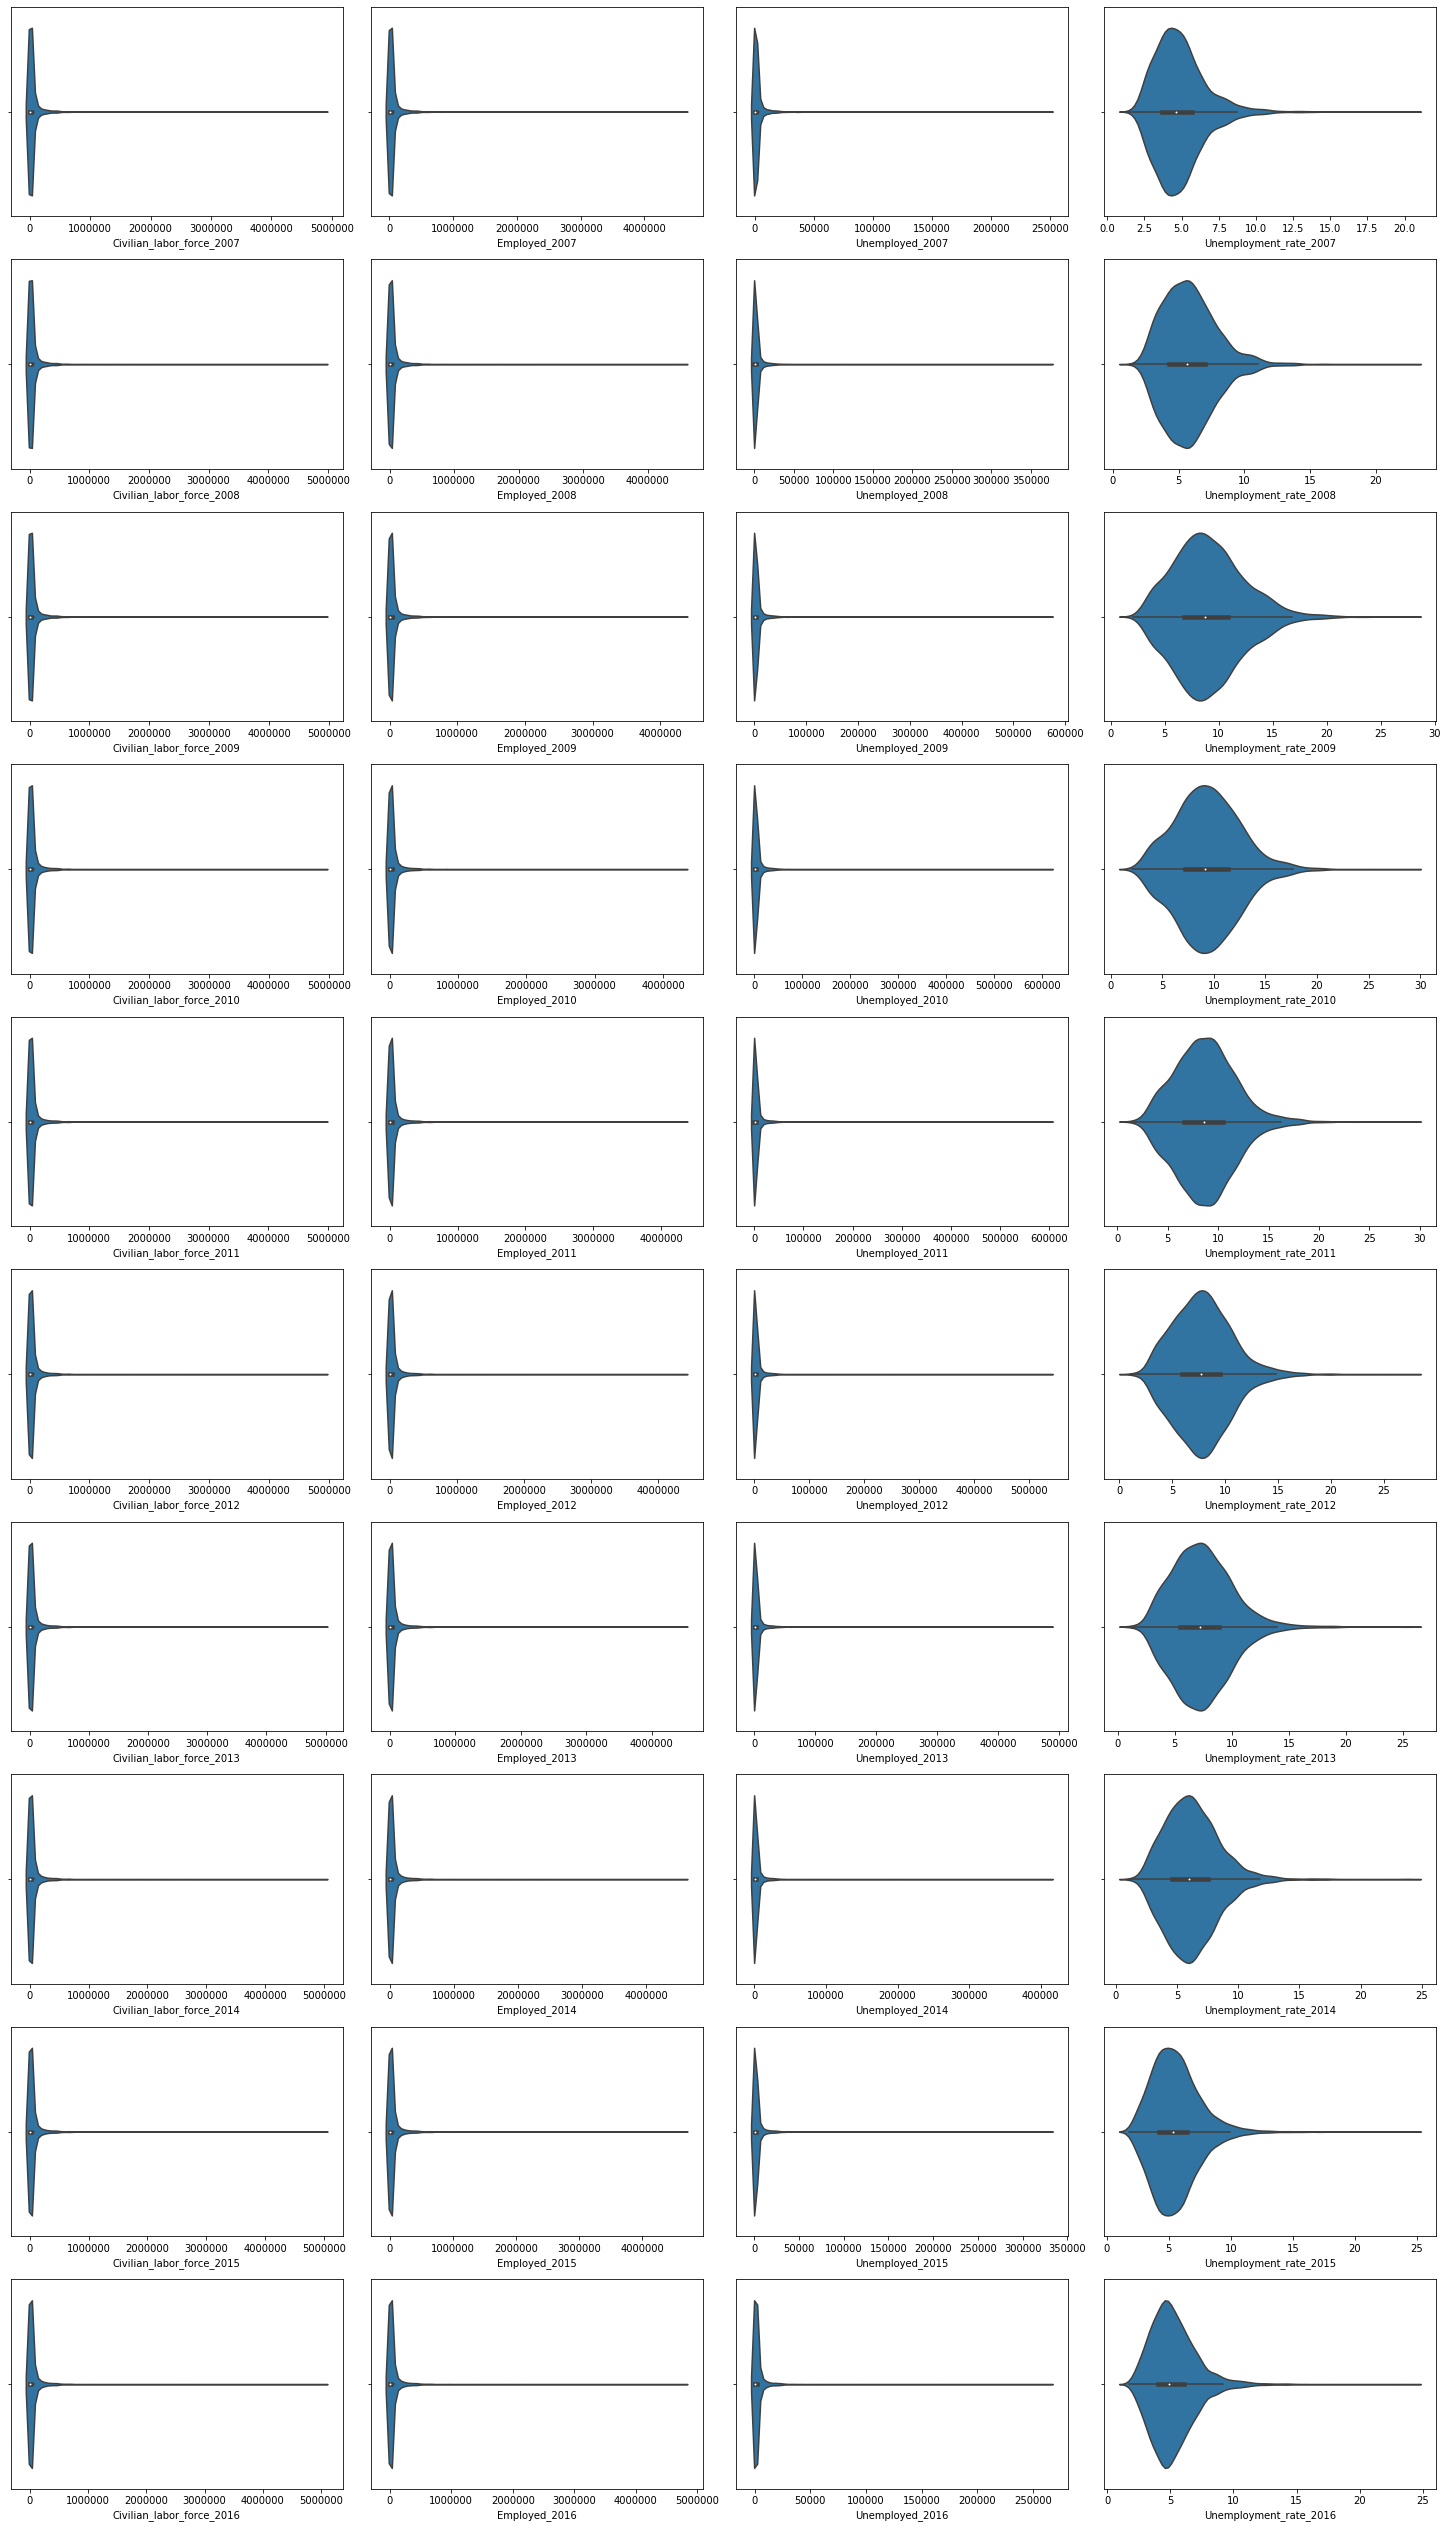

In [55]:
column_names = ['Civilian_labor_force_2007','Employed_2007','Unemployed_2007','Unemployment_rate_2007',
            'Civilian_labor_force_2008','Employed_2008','Unemployed_2008','Unemployment_rate_2008',
            'Civilian_labor_force_2009','Employed_2009','Unemployed_2009','Unemployment_rate_2009',
            'Civilian_labor_force_2010','Employed_2010','Unemployed_2010','Unemployment_rate_2010',
            'Civilian_labor_force_2011','Employed_2011','Unemployed_2011','Unemployment_rate_2011',
            'Civilian_labor_force_2012','Employed_2012','Unemployed_2012','Unemployment_rate_2012',
            'Civilian_labor_force_2013','Employed_2013','Unemployed_2013','Unemployment_rate_2013',
            'Civilian_labor_force_2014','Employed_2014','Unemployed_2014','Unemployment_rate_2014',
            'Civilian_labor_force_2015','Employed_2015','Unemployed_2015','Unemployment_rate_2015',
            'Civilian_labor_force_2016','Employed_2016','Unemployed_2016','Unemployment_rate_2016']
plot_violin(df_une, column_names = column_names, rows = 10, cols = 4)

# Building predicting model to predict the median of household income 

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [57]:
# Getting the features
X = df_une[['Civilian_labor_force_2007','Employed_2007','Unemployed_2007','Unemployment_rate_2007',
            'Civilian_labor_force_2008','Employed_2008','Unemployed_2008','Unemployment_rate_2008',
            'Civilian_labor_force_2009','Employed_2009','Unemployed_2009','Unemployment_rate_2009',
            'Civilian_labor_force_2010','Employed_2010','Unemployed_2010','Unemployment_rate_2010',
            'Civilian_labor_force_2011','Employed_2011','Unemployed_2011','Unemployment_rate_2011',
            'Civilian_labor_force_2012','Employed_2012','Unemployed_2012','Unemployment_rate_2012',
            'Civilian_labor_force_2013','Employed_2013','Unemployed_2013','Unemployment_rate_2013',
            'Civilian_labor_force_2014','Employed_2014','Unemployed_2014','Unemployment_rate_2014',
            'Civilian_labor_force_2015','Employed_2015','Unemployed_2015','Unemployment_rate_2015',
            'Civilian_labor_force_2016','Employed_2016','Unemployed_2016','Unemployment_rate_2016']] # Features 

y = df_une['Median_Household_Income_2017'] # Keeping the Median_Household_Income_2017 as Target values 

In [58]:
# Splitting the data into three subsets, Training, Validating, and Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

## Linear regression

In [59]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_val, y_val)

0.38421959144965384

In [60]:
# The coefficients of the linear gression model
reg.coef_

array([-5.07702066e-01, -4.40586393e-01, -6.71157458e-02, -2.01017315e+03,
        8.96355825e-01,  1.28994339e-01,  7.67361486e-01,  1.02323201e+03,
       -8.49168573e-02,  1.03767000e-01, -1.88683879e-01,  1.89685179e+02,
        4.64378593e-01, -4.81338183e-01,  9.45716582e-01,  1.25161330e+03,
       -8.59777793e-01,  1.11144600e+00, -1.97122381e+00, -4.26915979e+03,
        3.78362657e-01, -1.44097871e-01,  5.22460405e-01,  4.83995729e+03,
        1.71835786e-01, -5.47908944e-01,  7.19744966e-01, -3.19586777e+03,
       -1.60610557e+00,  5.64690650e-01, -2.17079622e+00,  2.39899176e+03,
        1.25799820e+00, -7.71479555e-01,  2.02947762e+00, -3.97282682e+03,
       -1.50719804e-01,  5.89713673e-01, -7.40433534e-01,  7.58806316e+02])

In [61]:
# The intercept of the linear regression model
reg.intercept_

65506.461255205606

In [62]:
y_pred = reg.predict(X_val)

In [63]:
mse_LR = mean_squared_error(y_val, y_pred)

In [64]:
mae_LR = mean_absolute_error(y_val, y_pred)

## Support vector machine regression

In [65]:
reg_SVR = SVR(C=100, epsilon=0.1)

In [66]:
reg_SVR.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
y_pred_svr = reg_SVR.predict(X_val)

In [68]:
mae_SVR = mean_absolute_error(y_val, y_pred_svr)

In [69]:
mse_SVR = mean_squared_error(y_val, y_pred_svr)

## Ensemble learning: Random forest

In [70]:
random_forest = RandomForestRegressor(max_depth=2, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [71]:
y_pred_rd = random_forest.predict(X_val)

In [72]:
mae_RF = mean_absolute_error(y_val, y_pred_rd)

In [73]:
mse_RF = mean_squared_error(y_val, y_pred_rd)

In [74]:
print(random_forest.feature_importances_)

[0.01512234 0.027996   0.         0.0198809  0.         0.
 0.         0.         0.         0.05206752 0.         0.
 0.         0.01087441 0.         0.         0.         0.03011559
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.06186944
 0.         0.02725353 0.         0.         0.         0.45724576
 0.01212777 0.25270939 0.         0.03273735]


## Deep learning: Tensorflow and Keras 

In [75]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential 

Using TensorFlow backend.


In [76]:
X_train.shape[1]

40

In [96]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(40, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), ))
model.add(keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), ))
model.add(keras.layers.Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [97]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size = 3)

Train on 2006 samples, validate on 502 samples
Epoch 1/50
2006/2006 [==============================] - 1s 412us/sample - loss: 3010722893.0808 - val_loss: 2637650452.9084
Epoch 2/50
2006/2006 [==============================] - 1s 327us/sample - loss: 3218994094.4526 - val_loss: 4342229013.0359
Epoch 3/50
2006/2006 [==============================] - 1s 326us/sample - loss: 2668669886.9791 - val_loss: 2643527742.4701
Epoch 4/50
2006/2006 [==============================] - 1s 326us/sample - loss: 2792472277.4078 - val_loss: 2844839485.7052
Epoch 5/50
2006/2006 [==============================] - 1s 369us/sample - loss: 2779858015.0429 - val_loss: 2844155428.7171
Epoch 6/50
2006/2006 [==============================] - 1s 352us/sample - loss: 3360723305.7308 - val_loss: 2537811667.5060
Epoch 7/50
2006/2006 [==============================] - 1s 393us/sample - loss: 3030309122.1216 - val_loss: 2845340282.9004
Epoch 8/50
2006/2006 [==============================] - 1s 327us/sample - loss: 27804

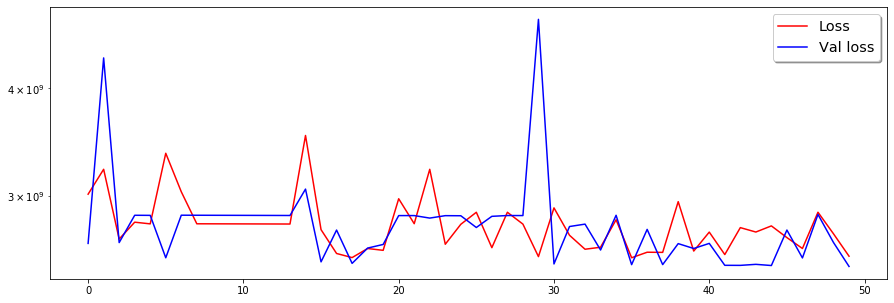

In [98]:
#fig, axs = plt.subplots((8, 5),constrained_layout=True)

loss = pd.DataFrame(history.history)
indx = [i for i in range(loss.shape[0])]

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(indx,loss["loss"],'-r', label="Loss") # Predicted values
plt.plot(indx,loss["val_loss"],'-b', label="Val loss") # Predicted values
ax.set_yscale('log')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')

In [99]:
y_pre_dl = model.predict(np.array(X_val))

In [100]:
mse_DL = mean_squared_error(y_val, y_pre_dl)
mse_DL

2479303080.873007

## Summary results

In [101]:
pre_LR_test = reg.predict(X_test)
mse_LR_test = mean_squared_error(y_test, pre_LR_test)

pre_SVR_test = reg_SVR.predict(X_test)
mse_SVR_test = mean_squared_error(y_test, pre_SVR_test)

pre_RF_test = random_forest.predict(X_test)
mse_RF_test = mean_squared_error(y_test, pre_RF_test)

pre_DL_test = model.predict(np.array(X_test))
mse_DL_test = mean_squared_error(y_test, pre_DL_test)

mae_LR_test = mean_absolute_error(y_test, pre_LR_test)
mae_SVR_test = mean_absolute_error(y_test, pre_SVR_test)
mae_RF_test = mean_absolute_error(y_test, pre_RF_test)
mae_DL_test = mean_absolute_error(y_test, pre_DL_test)

In [102]:
print("The mean square error (MSE) of Linear Regression on test data is ", mse_LR_test)
print("The mean sqaure error (MSE) of Support Vector machcine is ", mse_SVR_test)
print("The mean sqaure error (MSE) of Random Forest is,", mse_RF_test)
print("The mean sqaure error (MSE) of Deep Learning is,", mse_DL_test)
print("\n")

print("The mean absolute error (MAE) of Linear Regression is:", mae_LR_test)
print("The mean absolute error (MAE) of Support Vector machcine is ", mae_SVR_test)
print("The mean absolute error (MAE) of Random Forest is ", mae_RF_test)
print("The mean absolute error (MAE) of Deep Learning is ", mae_DL_test)

The mean square error (MSE) of Linear Regression on test data is  143081853.85935158
The mean sqaure error (MSE) of Support Vector machcine is  201282391.41390753
The mean sqaure error (MSE) of Random Forest is, 119980787.9906112
The mean sqaure error (MSE) of Deep Learning is, 2283971289.8351007


The mean absolute error (MAE) of Linear Regression is: 7839.243434034384
The mean absolute error (MAE) of Support Vector machcine is  9720.292078681552
The mean absolute error (MAE) of Random Forest is  7713.804999978078
The mean absolute error (MAE) of Deep Learning is  45929.45026844274


#### Let plot the real values and predicted values of household median incomes of the test data as follows. We plot only the results obtained from **Random Forest** model since it outperforms the others.  

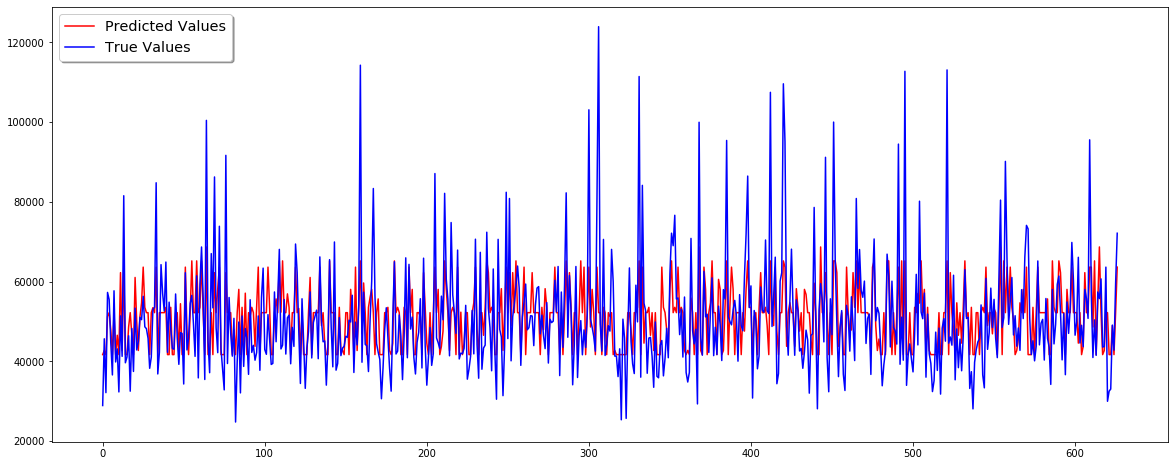

In [103]:
n = len(y_test)
indx = [i for i in range(n)]

pre_val = random_forest.predict(X_test)
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(indx[:n],pre_val[:n],'-r', label="Predicted Values") # Predicted values
plt.plot(indx[:n],y_test[:n],'-b', label="True Values") # True values
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')

#### The figure show that the predicted values is not much different from the real values. Not bad! 